# Proyek: Menyelesaikan Permasalahan Employe Atrition

* Nama: Andhar Siraj Munir
* Email: andhar.moenir@gmail.com
* Id Dicoding: andharsm

# Persiapan

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Load Dataset

In [ ]:
!wget https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv

--2024-07-25 15:55:49--  https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226188 (221K) [text/plain]
Saving to: ‘employee_data.csv.1’

employee_data.csv.1 100%[===================>] 220.89K  --.-KB/s    in 0.04s   

2024-07-25 15:55:49 (6.05 MB/s) - ‘employee_data.csv.1’ saved [226188/226188]



In [ ]:
df = pd.read_csv('employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


# Data Understanding

### Informasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

### Deskripsi Data

Deskripsi data numerik

In [ ]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Deskripsi data kategorikal

In [ ]:
df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


## Pengecekan Data Duplikat

In [ ]:
df.duplicated().sum()

0

## Pengecekan Missing Value

In [ ]:
df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Terdapat 412 missing value pada kolom attrition.

Sementara data null ini akan diisi dengan 'Invalid' untuk mempermudah visualisasi data.

Penanganan missing value sementara

In [ ]:
df_viz = df.copy()
df_viz['Attrition'] = df_viz['Attrition'].map({1: 'Yes', 0: 'No'})
df_viz['Attrition'] = df_viz['Attrition'].fillna('Invalid')
df_viz.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,Invalid,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,Invalid,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## EDA

Memisahkan data menjadi numerikal dan kategorikal, untuk data ordinal akan di visualisasikan sebagai kategorikal.

In [ ]:
# drop employeeid
df_viz = df_viz.drop(columns='EmployeeId')

In [ ]:
# kolom ordinal
ordinal_col = ['Education',
'EnvironmentSatisfaction',
'JobInvolvement',
'JobLevel',
'JobSatisfaction',
'PerformanceRating',
'RelationshipSatisfaction',
'WorkLifeBalance',
'StockOptionLevel']

In [ ]:
# maping data berdasarkan deskripsi atribut
education_mapping = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
satisfaction_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_mapping = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}

In [ ]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [ ]:
# data numerikal
df_num = df_viz.drop(columns=ordinal_col).select_dtypes(include=['int64', 'float64'])
print('Data numerikal')
display(df_num.head())
print()

# data kategorikal
df_cat = df.select_dtypes(include='object')
df_cat = pd.concat([df_viz['Attrition'], df_cat, df_viz[ordinal_col]], axis=1)

# replace data sesuai mapping
for col in ordinal_col:
  if col == 'Education':
    df_cat[col] = df_cat[col].replace(education_mapping)
  elif col in ['PerformanceRating', 'WorkLifeBalance']:
    df_cat[col] = df_cat[col].replace(performance_mapping)
  elif col in ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction']:
    df_cat[col] = df_cat[col].replace(satisfaction_mapping)

print('Data kategorikal')
display(df_cat.head())


Data numerikal


,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,1444,1,1,88,2991,5224,0,11,80,7,2,6,2,1,2
1,37,1141,11,1,61,4777,14382,5,15,80,15,2,1,0,0,0
2,51,1323,4,1,34,2461,10332,9,12,80,18,2,10,0,2,7
3,42,555,26,1,77,13525,14864,5,14,80,23,2,20,4,4,8
4,40,1194,2,1,98,2001,12549,2,14,80,20,2,5,3,0,2



Data kategorikal


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,StockOptionLevel
0,Invalid,Travel_Frequently,Human Resources,Other,Male,Human Resources,Married,Y,Yes,Master,Very High,High,1,Medium,Excellent,Medium,Excellent,1
1,Yes,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Married,Y,No,College,Low,Low,2,Medium,Excellent,Low,Low,0
2,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,Yes,Master,Low,High,1,High,Excellent,High,Outstanding,3
3,No,Travel_Frequently,Sales,Marketing,Female,Sales Executive,Married,Y,No,Bachelor,High,High,4,Medium,Excellent,Very High,Outstanding,1
4,Invalid,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Married,Y,No,Master,High,High,1,High,Excellent,Medium,Excellent,3


### Univariate Numerikal

#### Plot Histogram

In [ ]:
# jumlah kolom data
num_cols = len(df_num.columns)

# jumlah baris jika menampilkan 3 kolom per barisnya
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)

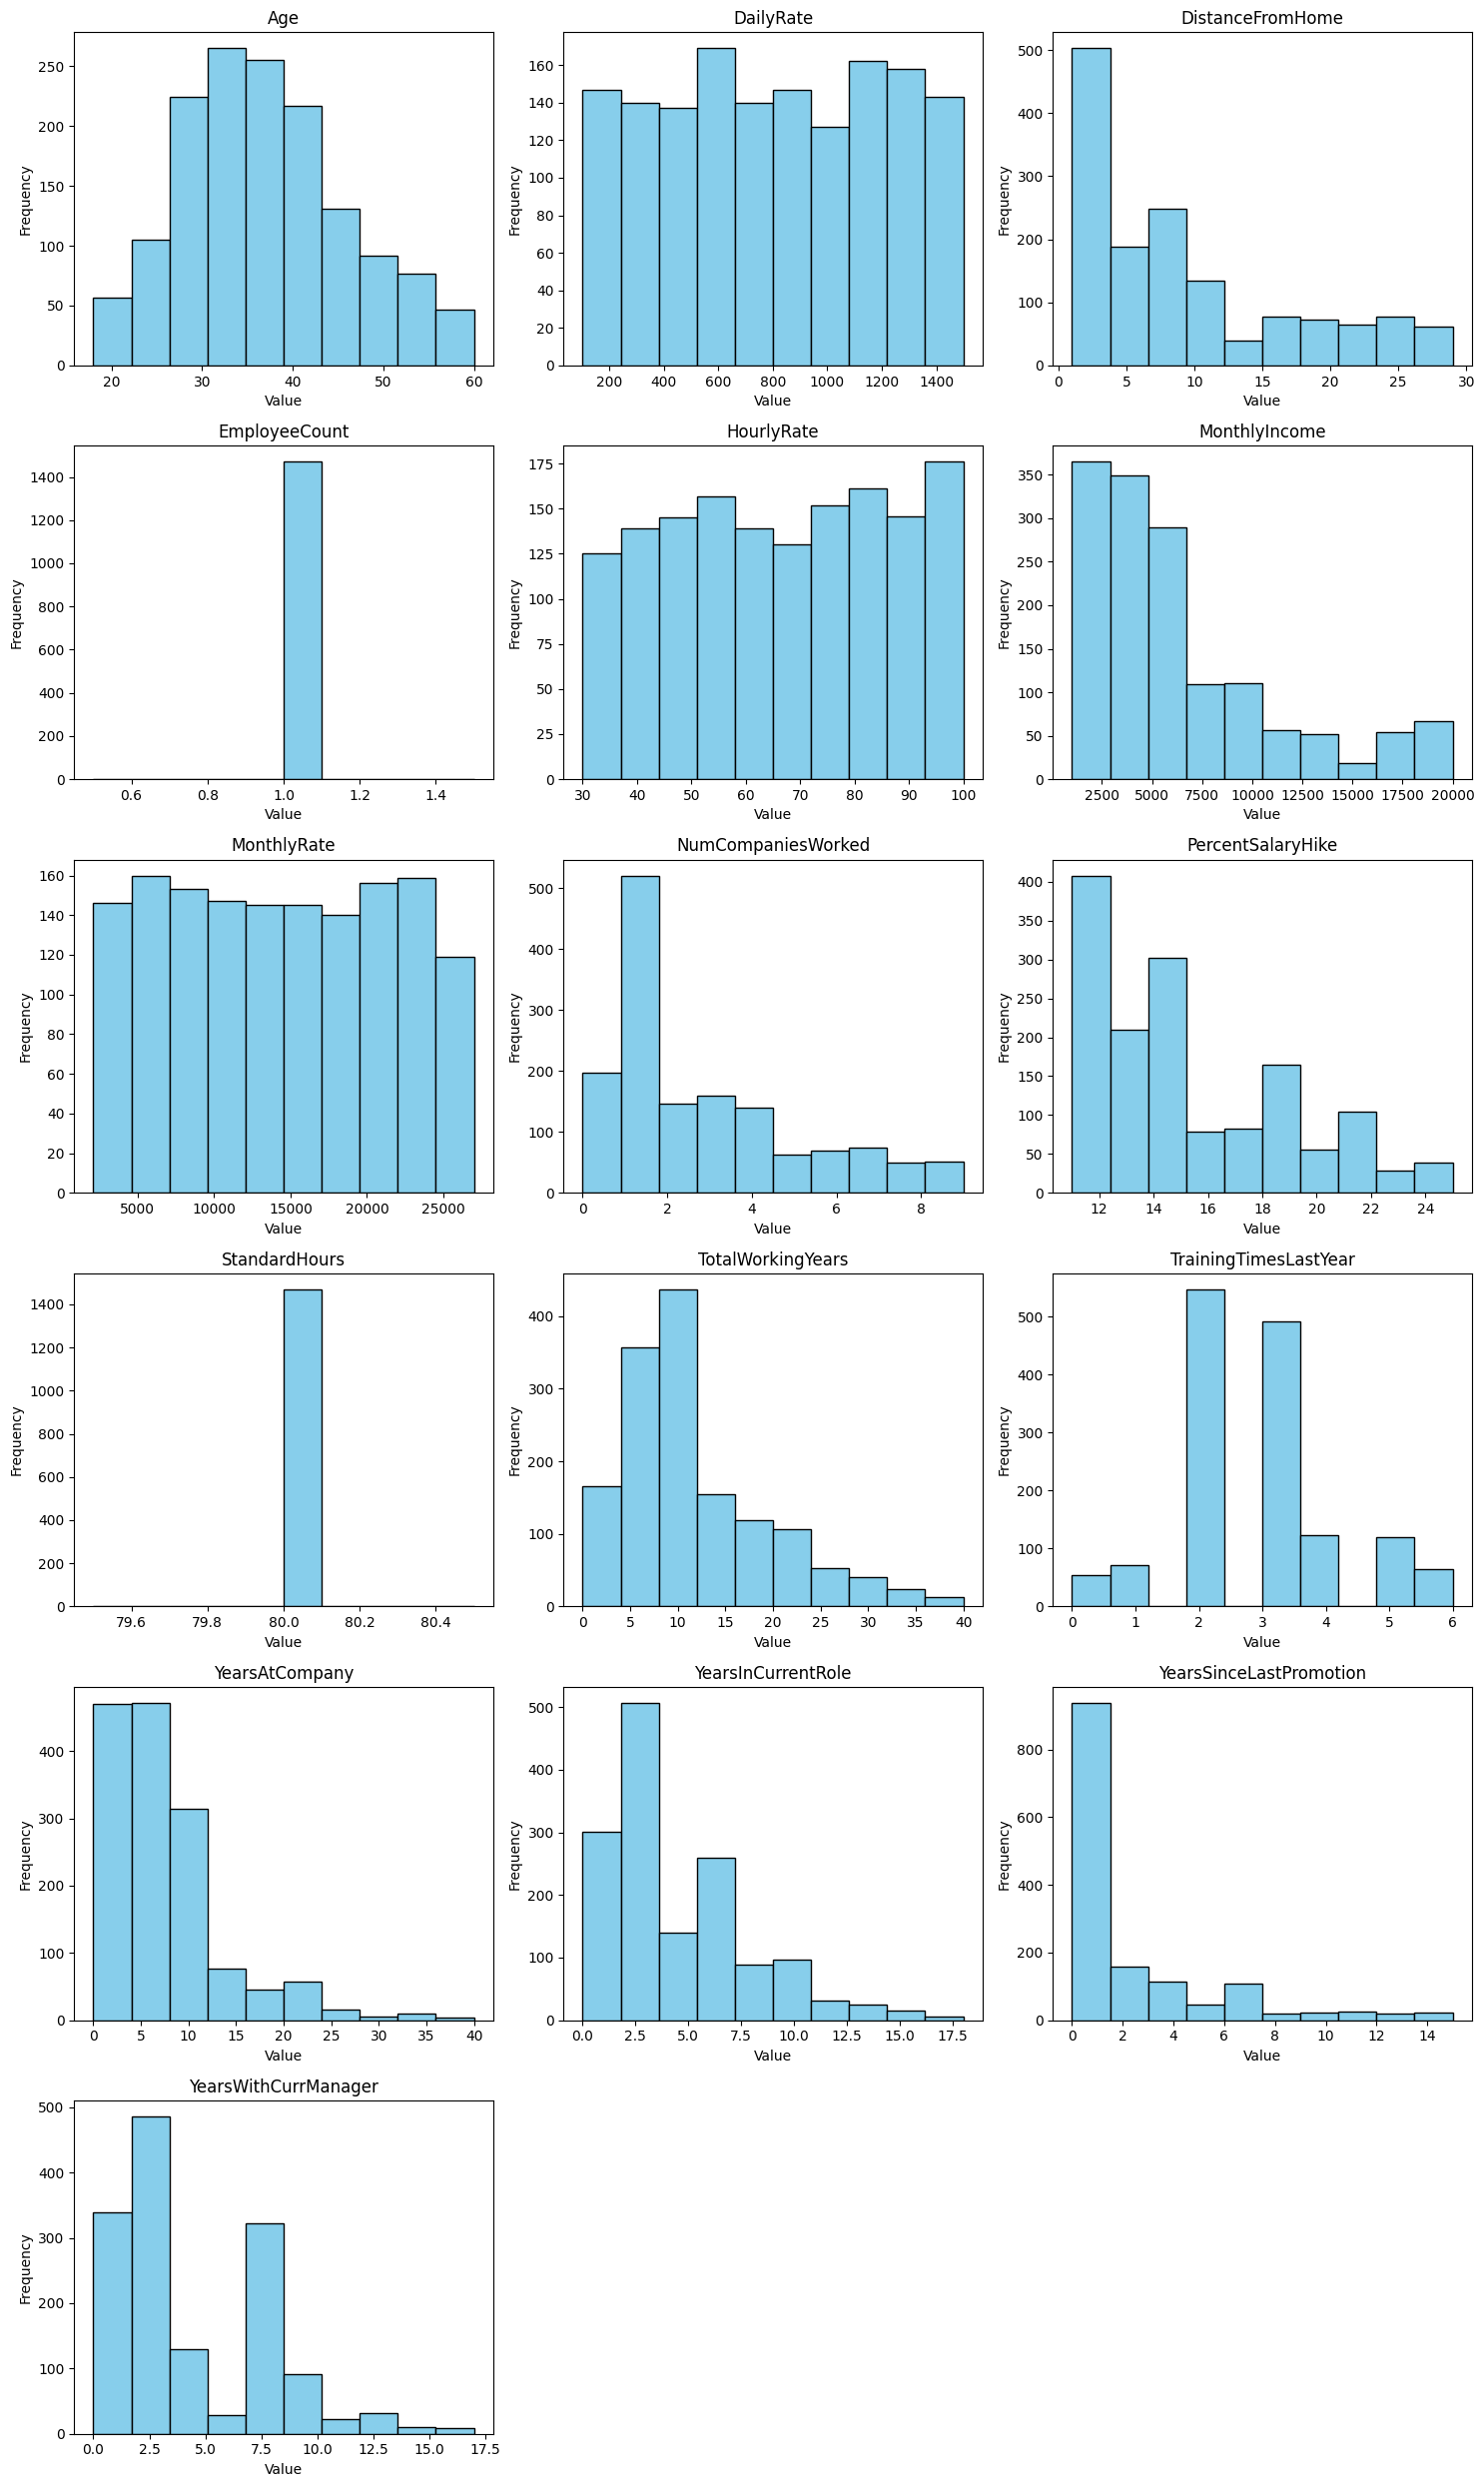

In [ ]:
# Histogram
# ukuran plot
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 25))

col_index = 0
for i in range(num_rows):
  for j in range(3):
    if col_index < num_cols:  # Check if col_index is within bounds
        col = df_num.columns[col_index]
        axs[i, j].hist(df_num[col], bins=10, color='skyblue', edgecolor='black')
        axs[i, j].set_title(col)
        axs[i, j].set_xlabel('Value')
        axs[i, j].set_ylabel('Frequency')
        col_index += 1
    else:
        axs[i, j].axis('off')  # Hide unused subplots


plt.tight_layout()
plt.show()

#### Boxplot

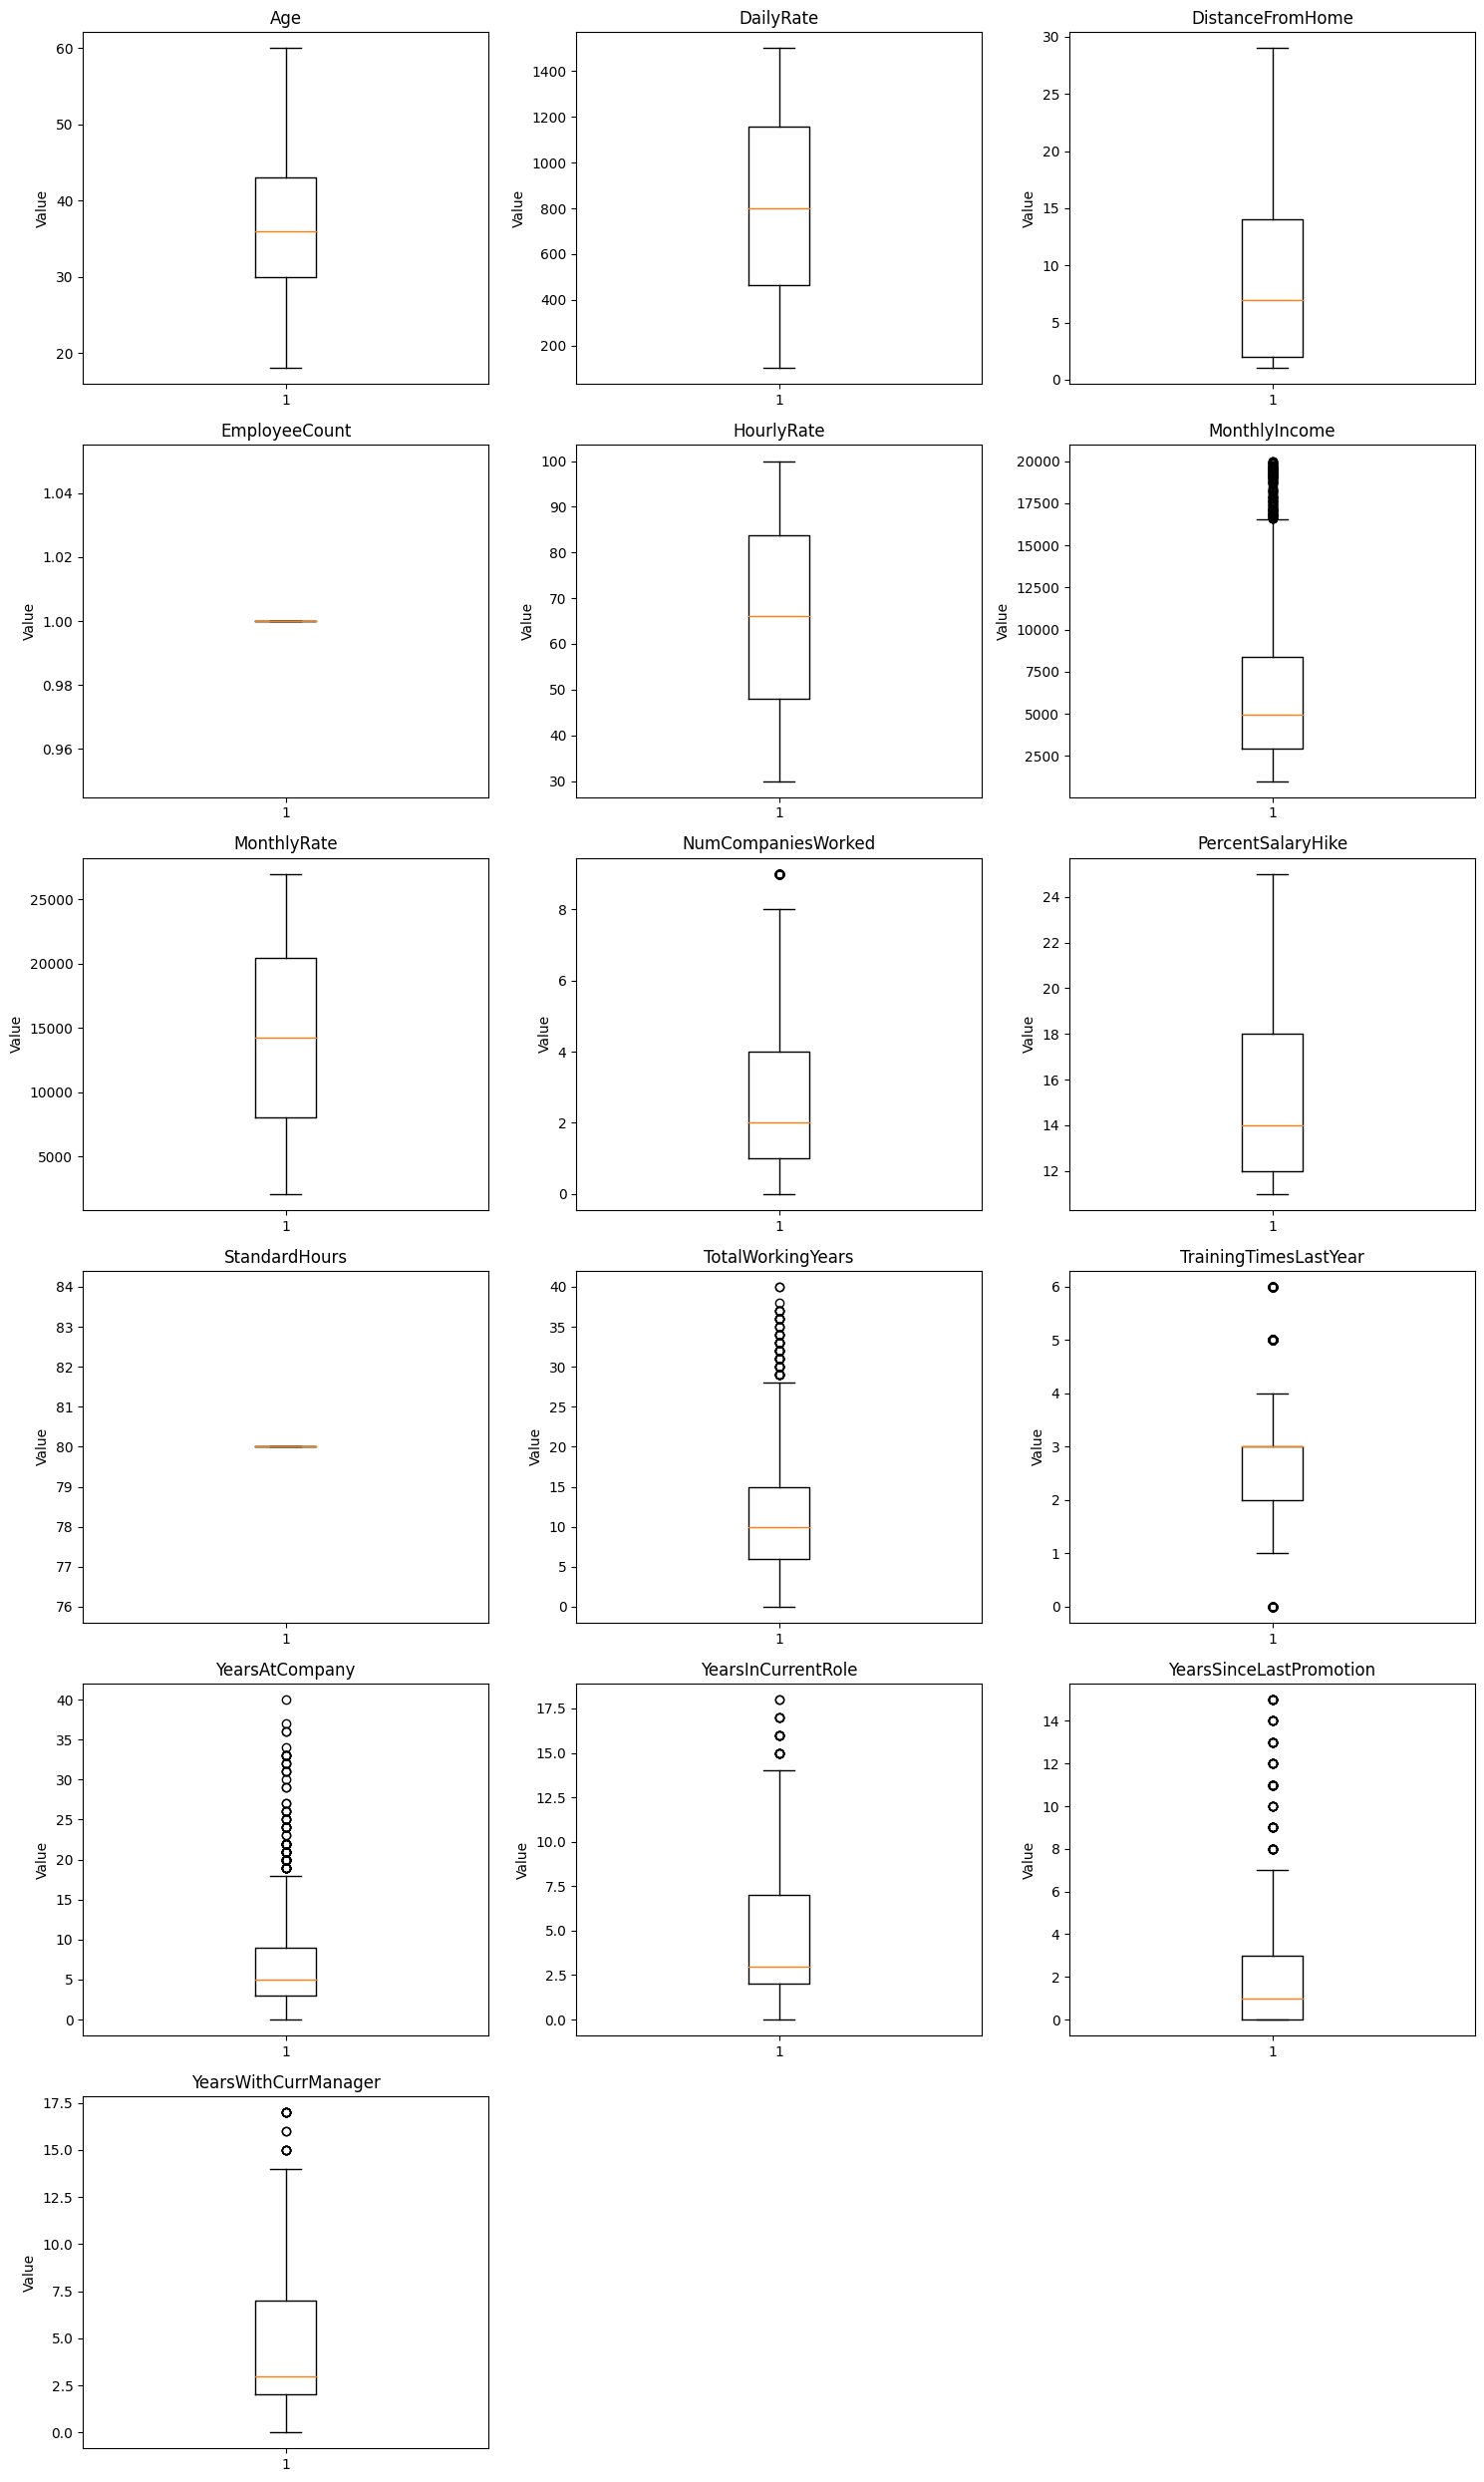

In [ ]:
# Boxplot
# ukuran plot
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 25))

col_index = 0
for i in range(num_rows):
  for j in range(3):
    if col_index < num_cols:  # Check if col_index is within bounds
      col = df_num.columns[col_index]
      axs[i, j].boxplot(df_num[col])
      axs[i, j].set_title(col)
      axs[i, j].set_ylabel('Value')
      col_index += 1
    else:
        axs[i, j].axis('off')  # Hide unused subplots

plt.tight_layout()
plt.show()

#### Pengecekan Outlier

In [ ]:
description = df_num.describe()

# Menambahkan IQR
iqr = description.loc['75%'] - description.loc['25%']
max_row = description.loc['max']
max_row.name = 'IQR'
description.loc['IQR'] = iqr

description

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000
IQR,13.000000,692.000000,12.000000,0.0,35.750000,5468.000000,12414.500000,3.000000,6.000000,0.0,9.000000,1.000000,6.000000,5.000000,3.000000,5.000000


In [ ]:
# Hitung lower whisker dan upper whisker untuk setiap kolom
whiskers = {}
for col in df_num.columns:
    q1 = description.loc['25%', col]
    q3 = description.loc['75%', col]
    iqr = description.loc['IQR', col]
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    whiskers[col] = {'Lower Whisker': lower_whisker, 'Upper Whisker': upper_whisker}

# membuat dataframe
df_whiskers = pd.DataFrame.from_dict(whiskers, orient='index')
df_whiskers

,Lower Whisker,Upper Whisker
Age,10.500,62.500
DailyRate,-573.000,2195.000
DistanceFromHome,-16.000,32.000
EmployeeCount,1.000,1.000
HourlyRate,-5.625,137.375
MonthlyIncome,-5291.000,16581.000
MonthlyRate,-10574.750,39083.250
NumCompaniesWorked,-3.500,8.500
PercentSalaryHike,3.000,27.000
StandardHours,80.000,80.000


In [ ]:
whiskers

{'Age': {'Lower Whisker': 10.5, 'Upper Whisker': 62.5},
 'DailyRate': {'Lower Whisker': -573.0, 'Upper Whisker': 2195.0},
 'DistanceFromHome': {'Lower Whisker': -16.0, 'Upper Whisker': 32.0},
 'EmployeeCount': {'Lower Whisker': 1.0, 'Upper Whisker': 1.0},
 'HourlyRate': {'Lower Whisker': -5.625, 'Upper Whisker': 137.375},
 'MonthlyIncome': {'Lower Whisker': -5291.0, 'Upper Whisker': 16581.0},
 'MonthlyRate': {'Lower Whisker': -10574.75, 'Upper Whisker': 39083.25},
 'NumCompaniesWorked': {'Lower Whisker': -3.5, 'Upper Whisker': 8.5},
 'PercentSalaryHike': {'Lower Whisker': 3.0, 'Upper Whisker': 27.0},
 'StandardHours': {'Lower Whisker': 80.0, 'Upper Whisker': 80.0},
 'TotalWorkingYears': {'Lower Whisker': -7.5, 'Upper Whisker': 28.5},
 'TrainingTimesLastYear': {'Lower Whisker': 0.5, 'Upper Whisker': 4.5},
 'YearsAtCompany': {'Lower Whisker': -6.0, 'Upper Whisker': 18.0},
 'YearsInCurrentRole': {'Lower Whisker': -5.5, 'Upper Whisker': 14.5},
 'YearsSinceLastPromotion': {'Lower Whisker': 

In [ ]:
# Inisialisasi dictionary untuk menyimpan informasi outlier
outliers_info = {}

for col in df_num.columns:
    # deklarasi whiskers tiap kolom
    lower_whiskers = whiskers[col]['Lower Whisker']
    upper_whiskers = whiskers[col]['Upper Whisker']

    # Mengidentifikasi outlier
    outliers = df_num[(df_num[col] < lower_whiskers) | (df_num[col] > upper_whiskers)][col]

    # Menghitung jumlah outlier
    outlier_count = outliers.count()

    # Menghitung proporsi outlier
    total_count = df_num[col].count()
    outlier_proportion = round((outlier_count / total_count) * 100, 2)

    # Mengurutkan unique outliers
    unique_outliers = outliers.unique()
    unique_outliers.sort()

    outliers_info[col] = {'Count': outlier_count, 'Proportion': outlier_proportion, 'Outliers': unique_outliers}

# Membuat DataFrame dari outliers_info
df_outliers = pd.DataFrame.from_dict(outliers_info, orient='index')

# Menampilkan DataFrame
df_outliers

,Count,Proportion,Outliers
Age,0,0.00,[]
DailyRate,0,0.00,[]
DistanceFromHome,0,0.00,[]
EmployeeCount,0,0.00,[]
HourlyRate,0,0.00,[]
MonthlyIncome,114,7.76,"[16595, 16598, 16606, 16627, 16659, 16704, 167..."
MonthlyRate,0,0.00,[]
NumCompaniesWorked,52,3.54,[9]
PercentSalaryHike,0,0.00,[]
StandardHours,0,0.00,[]


Berdasarkan hasil analisis diatas terdapat beberapa insight sebagai berikut:



*   Mayoritas karyawan berada di rentang usia 30 hingga 40 tahun dengan rata-rata 36 tahun.
*   Mayoritas karyawan memiliki jarak yang dekat dari rumah dengan rentang 1-10 mil
* Terdapat sejumlah besar karyawan dengan pendapatan bulanan rendah, sementara jumlah karyawan dengan pendapatan bulanan tinggi lebih sedikit.
* Sebagian besar karyawan telah bekerja di 1 hingga 2 perusahaan sebelumnya.
* Mayoritas karyawan menerima kenaikan gaji antara 11% hingga 18%, dengan rata-rata keseluruhan sebesar 15%.
* Semua karyawan memiliki value standarhours yang sama, data ini akan didrop.
* Sebagian besar karyawan memiliki masa kerja 5 hingga 15 tahun.
* Mayoritas karyawan mendapatkan promosi terakhir sekitar 2-3 tahun.
* Berdasarkan whiskers yang ditentukan beberapa kolom memiliki outlier yang signifikan, seperti MonthlyIncome, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, dan lainnya.

**Pada proyek ini tidak dilakukan outliers handling karena memerlukan analisa dan percobaan mendalam**

### Univariate Kategorikal

#### Bar Chart

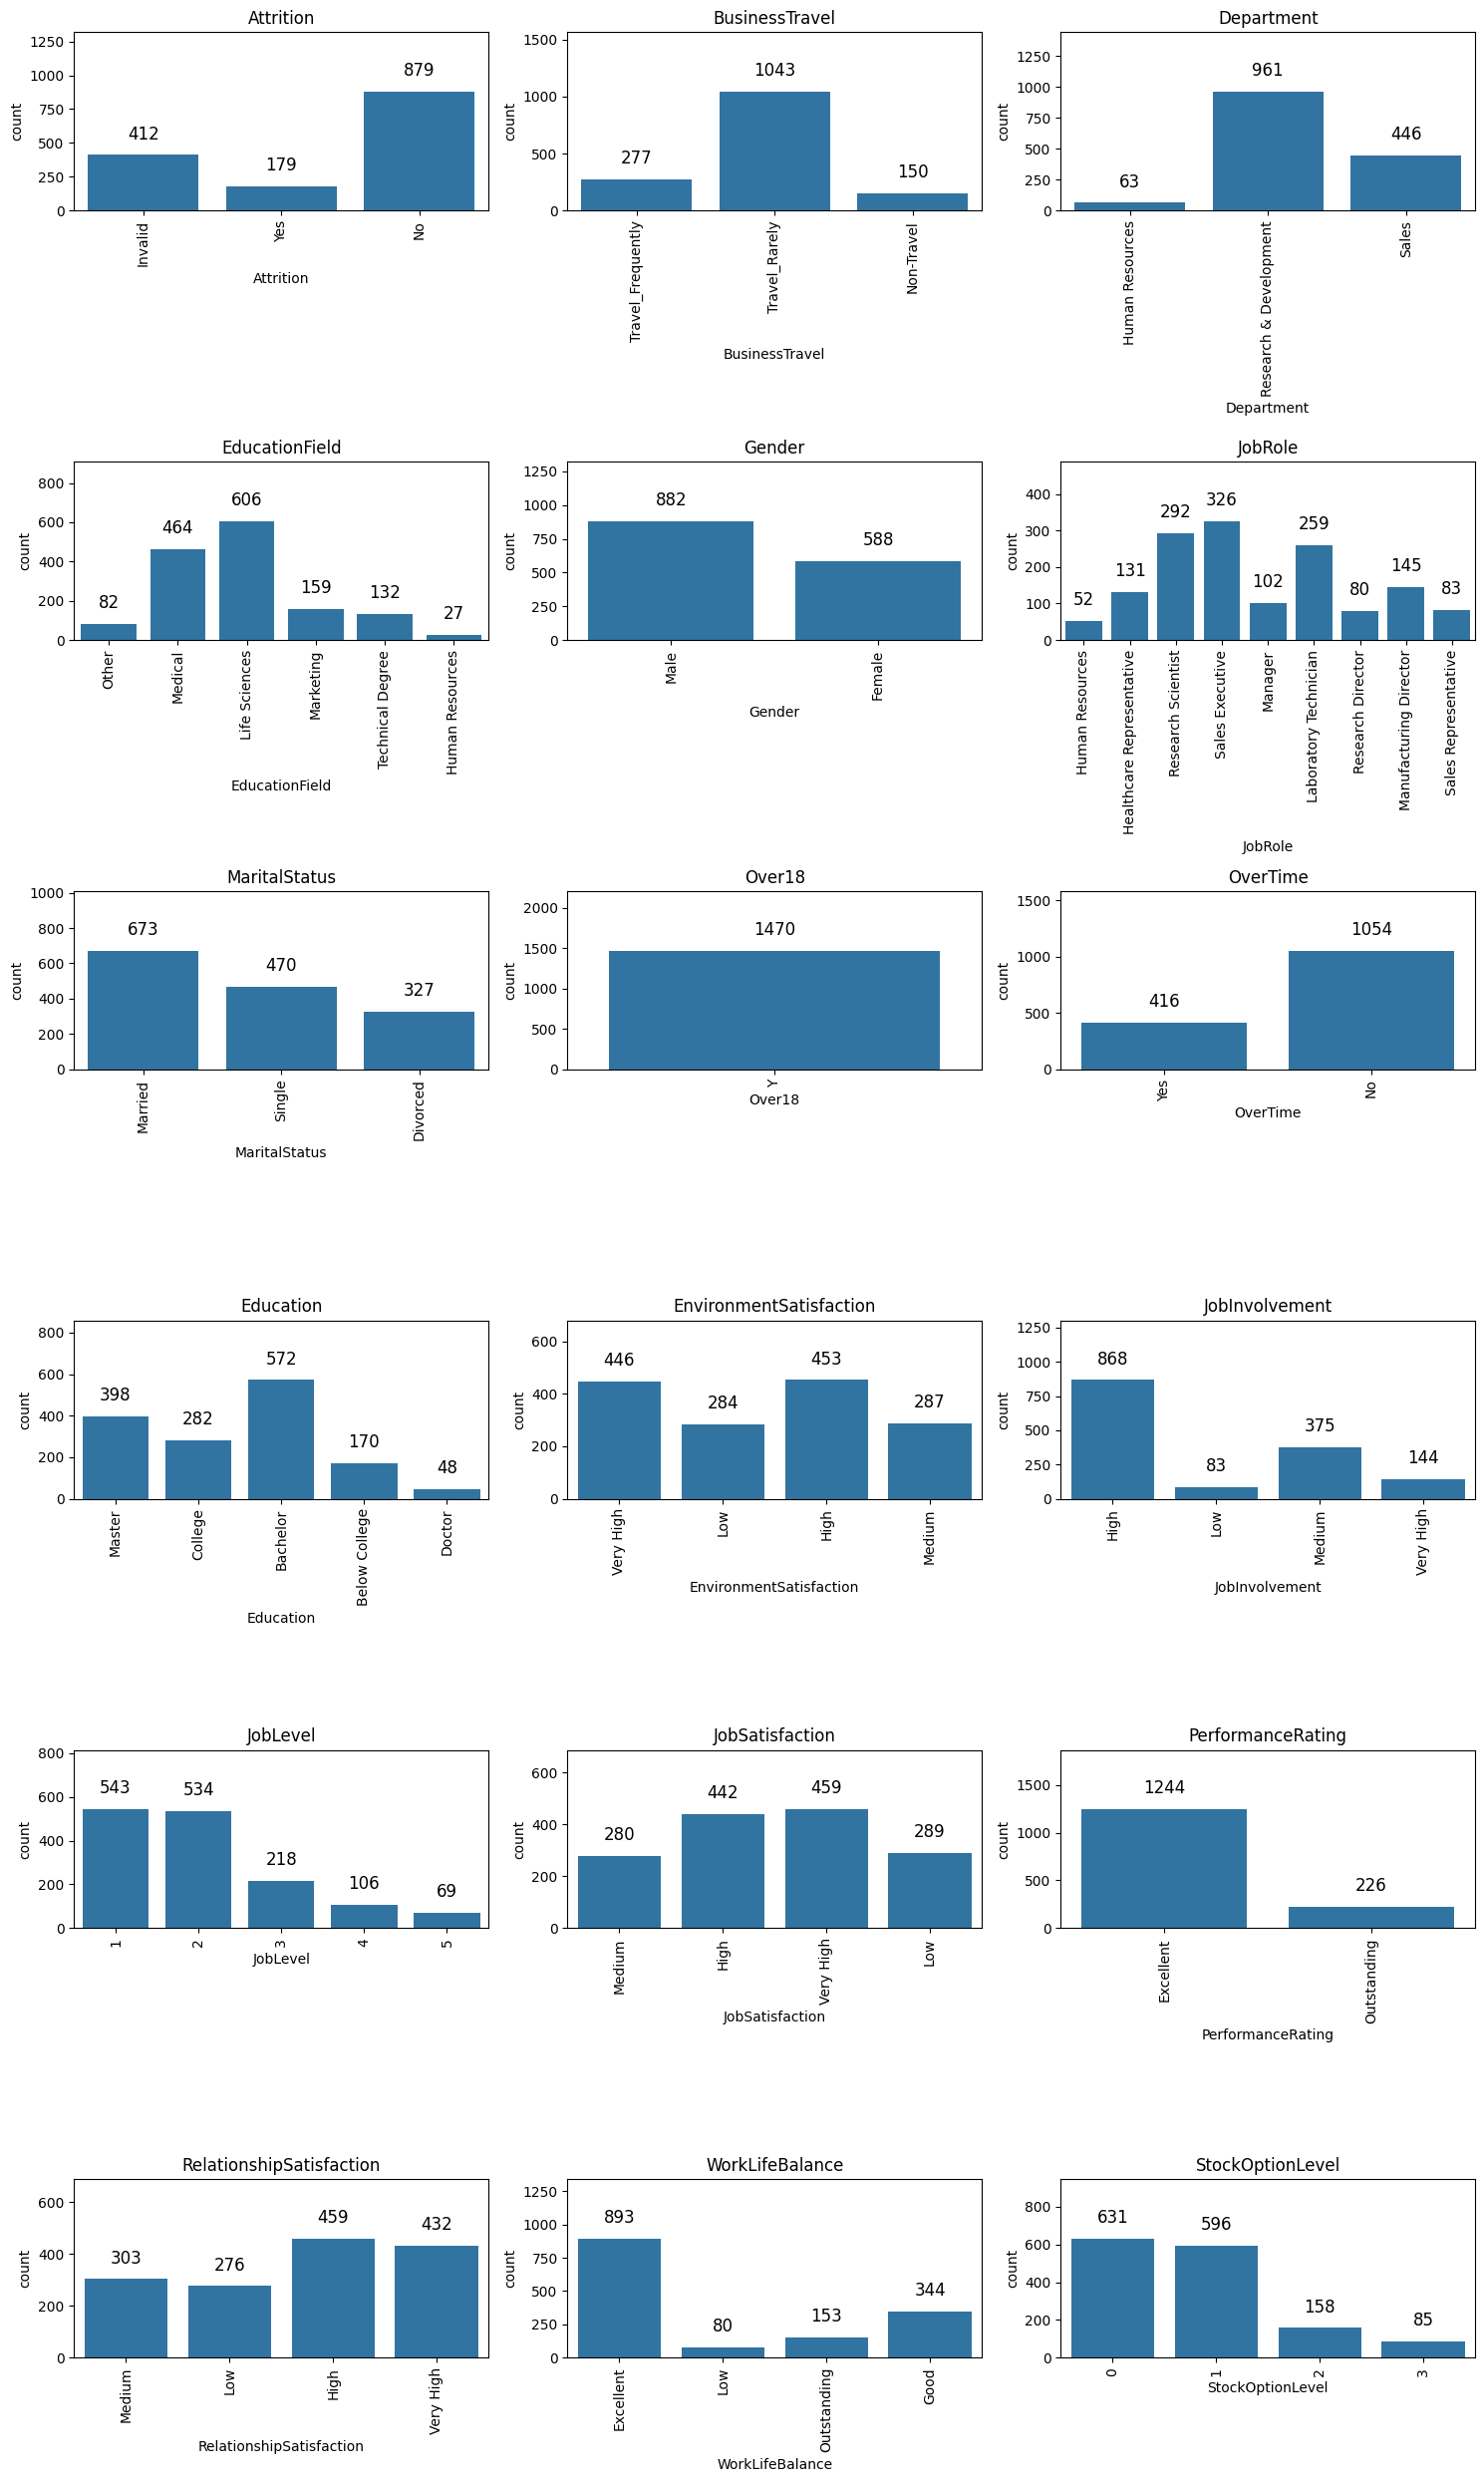

In [ ]:
plt.figure(figsize=(15, 25))
for i, col in enumerate(df_cat.columns):
    plt.subplot(6, 3, i+1)
    ax = sns.countplot(data=df_cat, x=col)
    plt.title(f'{col}')
    plt.xticks(rotation=90)

    # Menambahkan nilai di atas setiap bar dengan padding lebih besar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 15),
                    textcoords='offset points')

    # Mengatur batas sumbu y agar lebih tinggi
    max_height = max([p.get_height() for p in ax.patches])
    ax.set_ylim(0, max_height * 1.5)  # 50% padding atas

plt.tight_layout()
plt.show()


#### Pie Chart

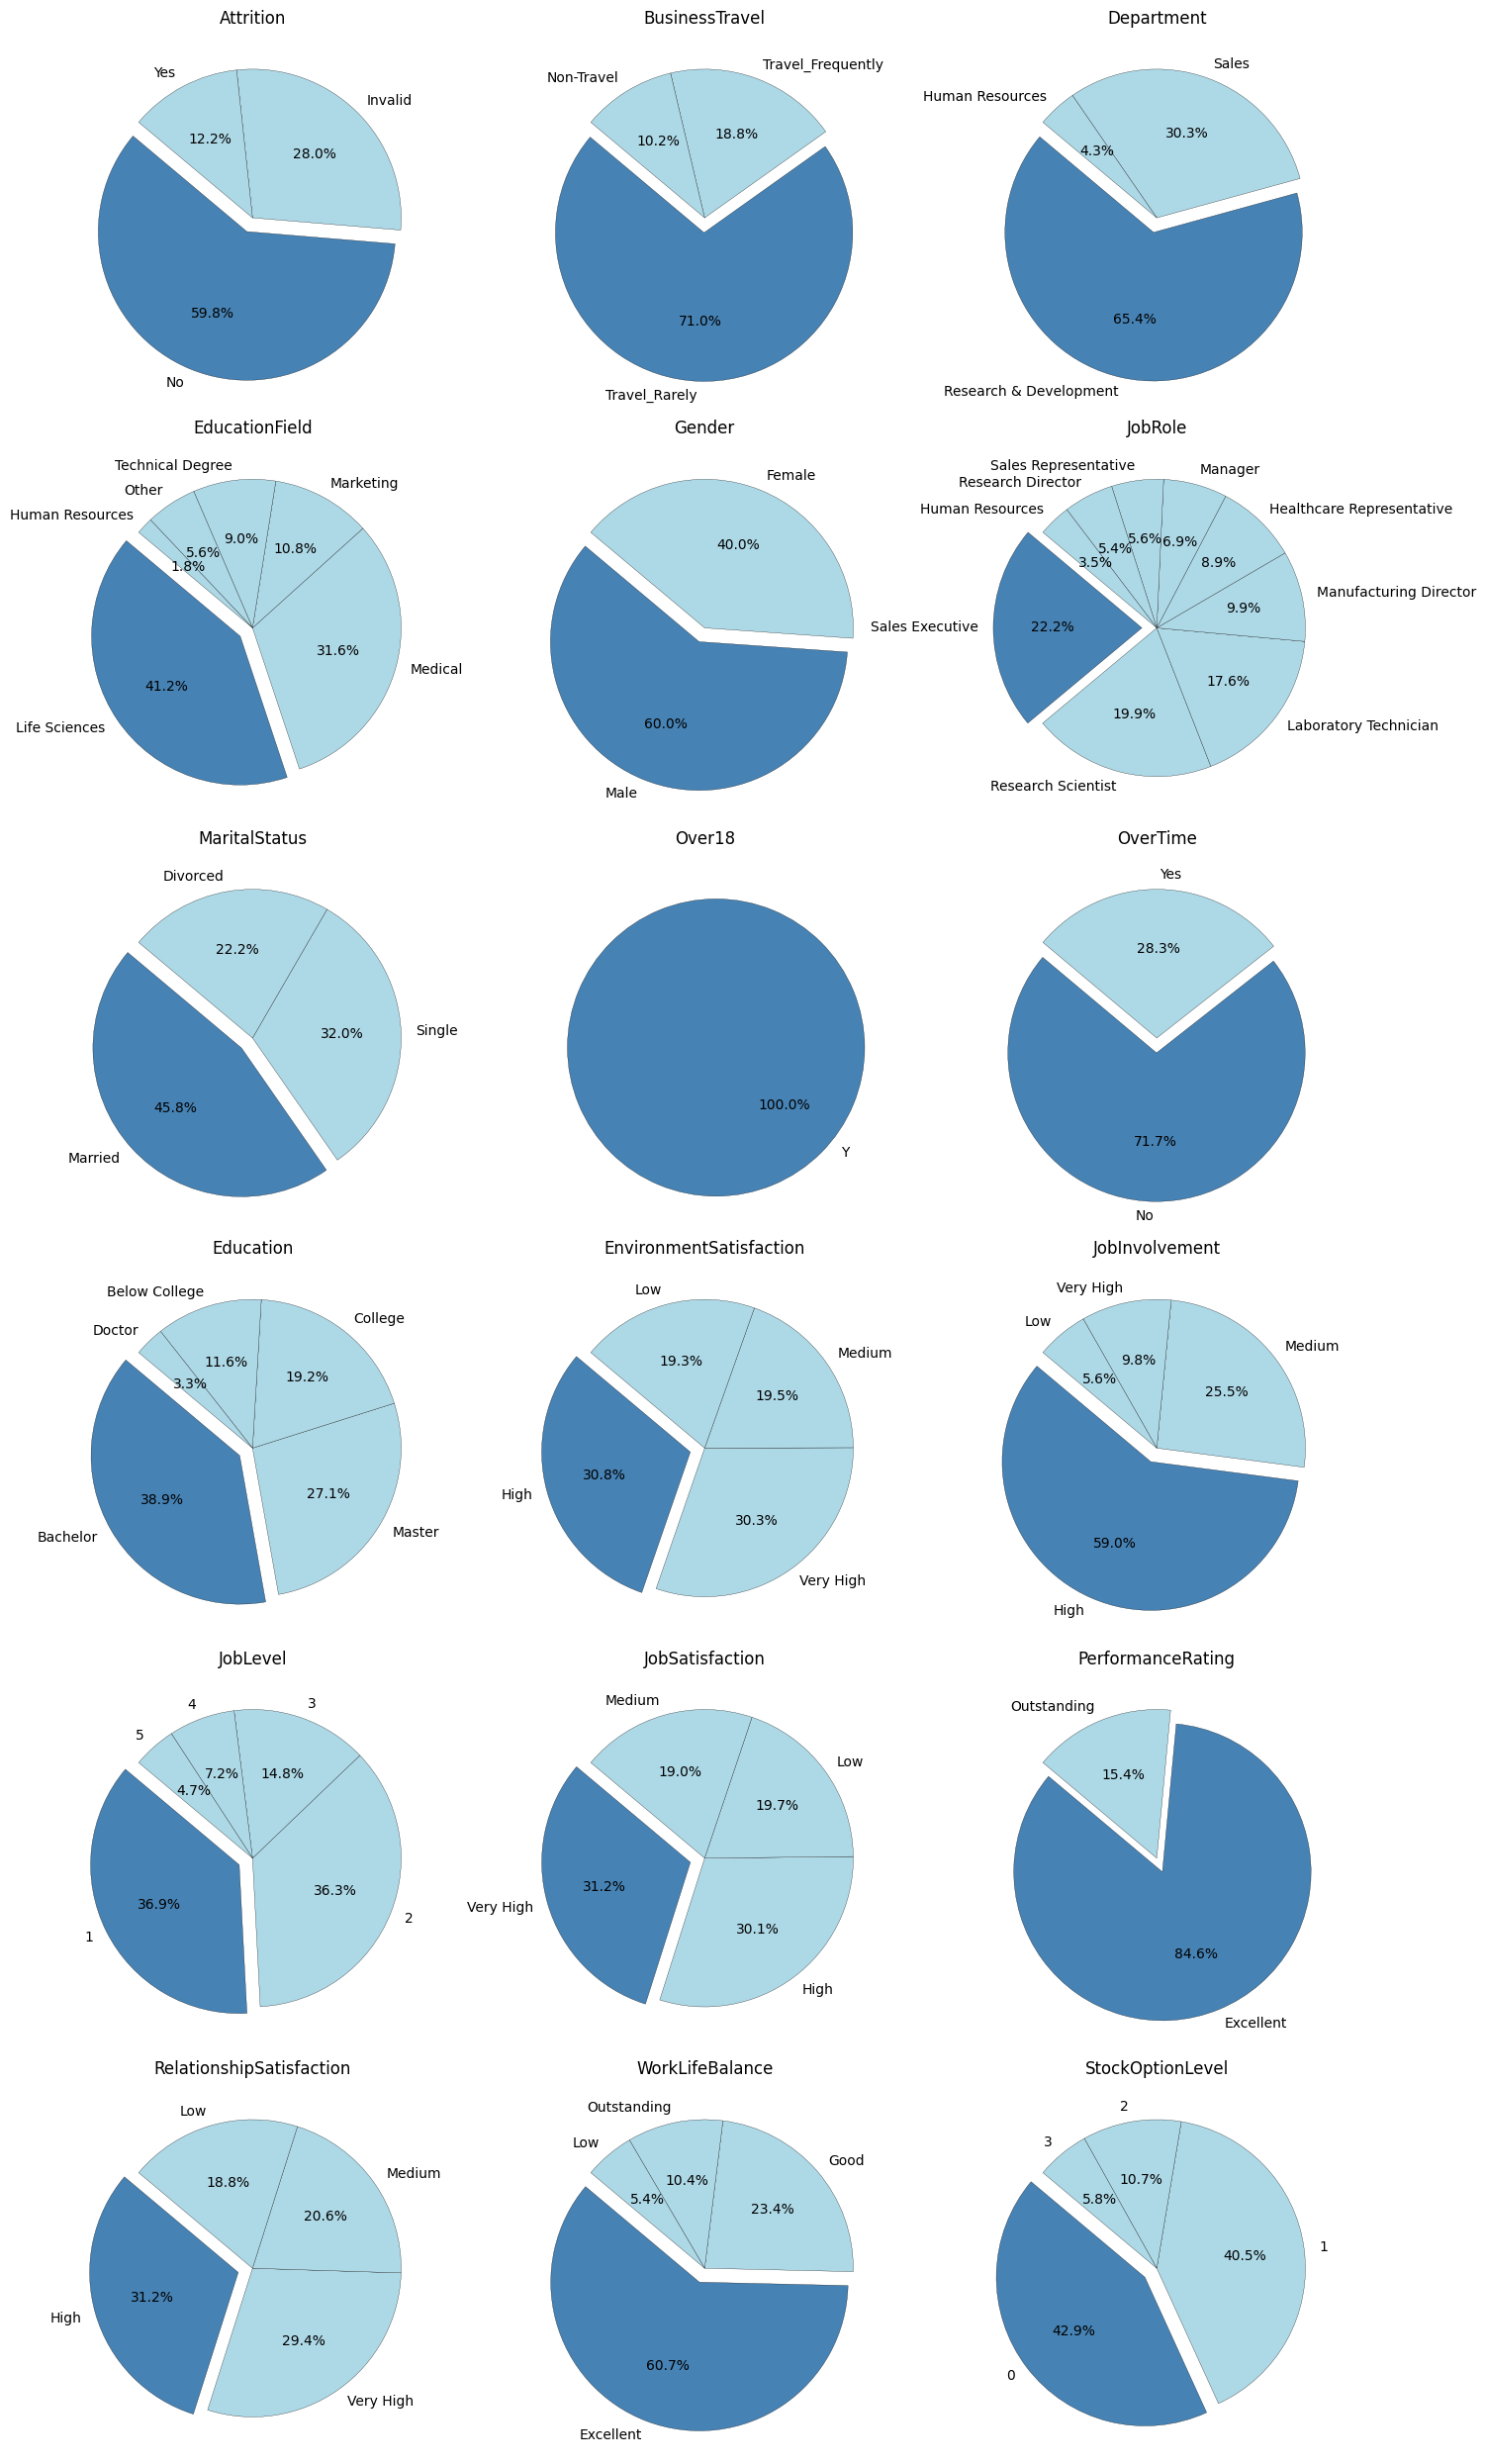

In [ ]:
plt.figure(figsize=(15, 25))
for i, col in enumerate(df_cat.columns):
    plt.subplot(6, 3, i+1)
    counts = df_cat[col].value_counts()
    labels = counts.index
    sizes = counts.values

    # Menentukan warna dan explode
    colors = ['steelblue' if size == max(sizes) else 'lightblue' for size in sizes]
    explode = [0.1 if size == max(sizes) else 0 for size in sizes] # Explode the majority slice

    plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140, wedgeprops = {'linewidth': 0.2, 'edgecolor': 'black'})
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

Berdasarkan hasil analisis diatas terdapat beberapa insight sebagai berikut:

* Terdapat 28% data invalid pada atrition, data ini nanti akan dipisahkan untuk diprediksi setelah mendapakan model pelatihan model untuk mengetahui lebih jelas attrition keseluruhan.
* Mayoritas karyawan (71.9%) jarang melakukan perjalanan bisnis (Travel_Rarely). 18.8% karyawan sering melakukan perjalanan bisnis (Travel_Frequently). Hanya 10.2% karyawan yang tidak melakukan perjalanan bisnis (Non-Travel).
* Sebagian besar karyawan bekerja di departemen Research & Development (65.4%). Diikuti oleh Sales (30.3%) dan Human Resources (4.3%).
* Terdapat lebih banyak karyawan laki-laki (60%) dibandingkan perempuan (40%).
* Posisi Sales Executive (22.2%) dan Research Scientist (19.9%) adalah yang paling umum.
Diikuti oleh Laboratory Technician (17.6%) dan Manufacturing Director (9.9%).
* Sebagian besar karyawan sudah menikah (45.8%). 32.0% masih lajang dan 22.2% bercerai.
* Semua karyawan berusia di atas 18 tahun (100%). Data ini akan didrop.
* Mayoritas karyawan tidak bekerja lembur (71.7%). 28.3% karyawan bekerja lembur.
* Mayoritas karyawan memiliki gelar Sarjana (38.9%). Diikuti oleh gelar Master (27.1%) dan College (19.2%).
* Tingkat kepuasan lingkungan kerja cukup merata, dengan sedikit kecenderungan ke arah positif.
* Mayoritas karyawan memiliki keterlibatan kerja yang tinggi (59.0%).
* Sebagian besar karyawan berada di level 1 (36.9%) dan level 2 (36.3%).
* Tingkat kepuasan kerja cukup merata di semua level.
* Sebagian besar karyawan (84.6%) memiliki rating kinerja "Excellent".
* Tingkat kepuasan hubungan kerja cukup merata, dengan kecenderungan ke arah positif.
* Mayoritas karyawan (60.7%) menilai keseimbangan kerja-hidup mereka "Excellent".
* Sebagian besar karyawan memiliki stock option level 0 (42.9%) atau 1 (40.5%).






### Multivariate Numerikal w/ Atrition

#### Boxplot

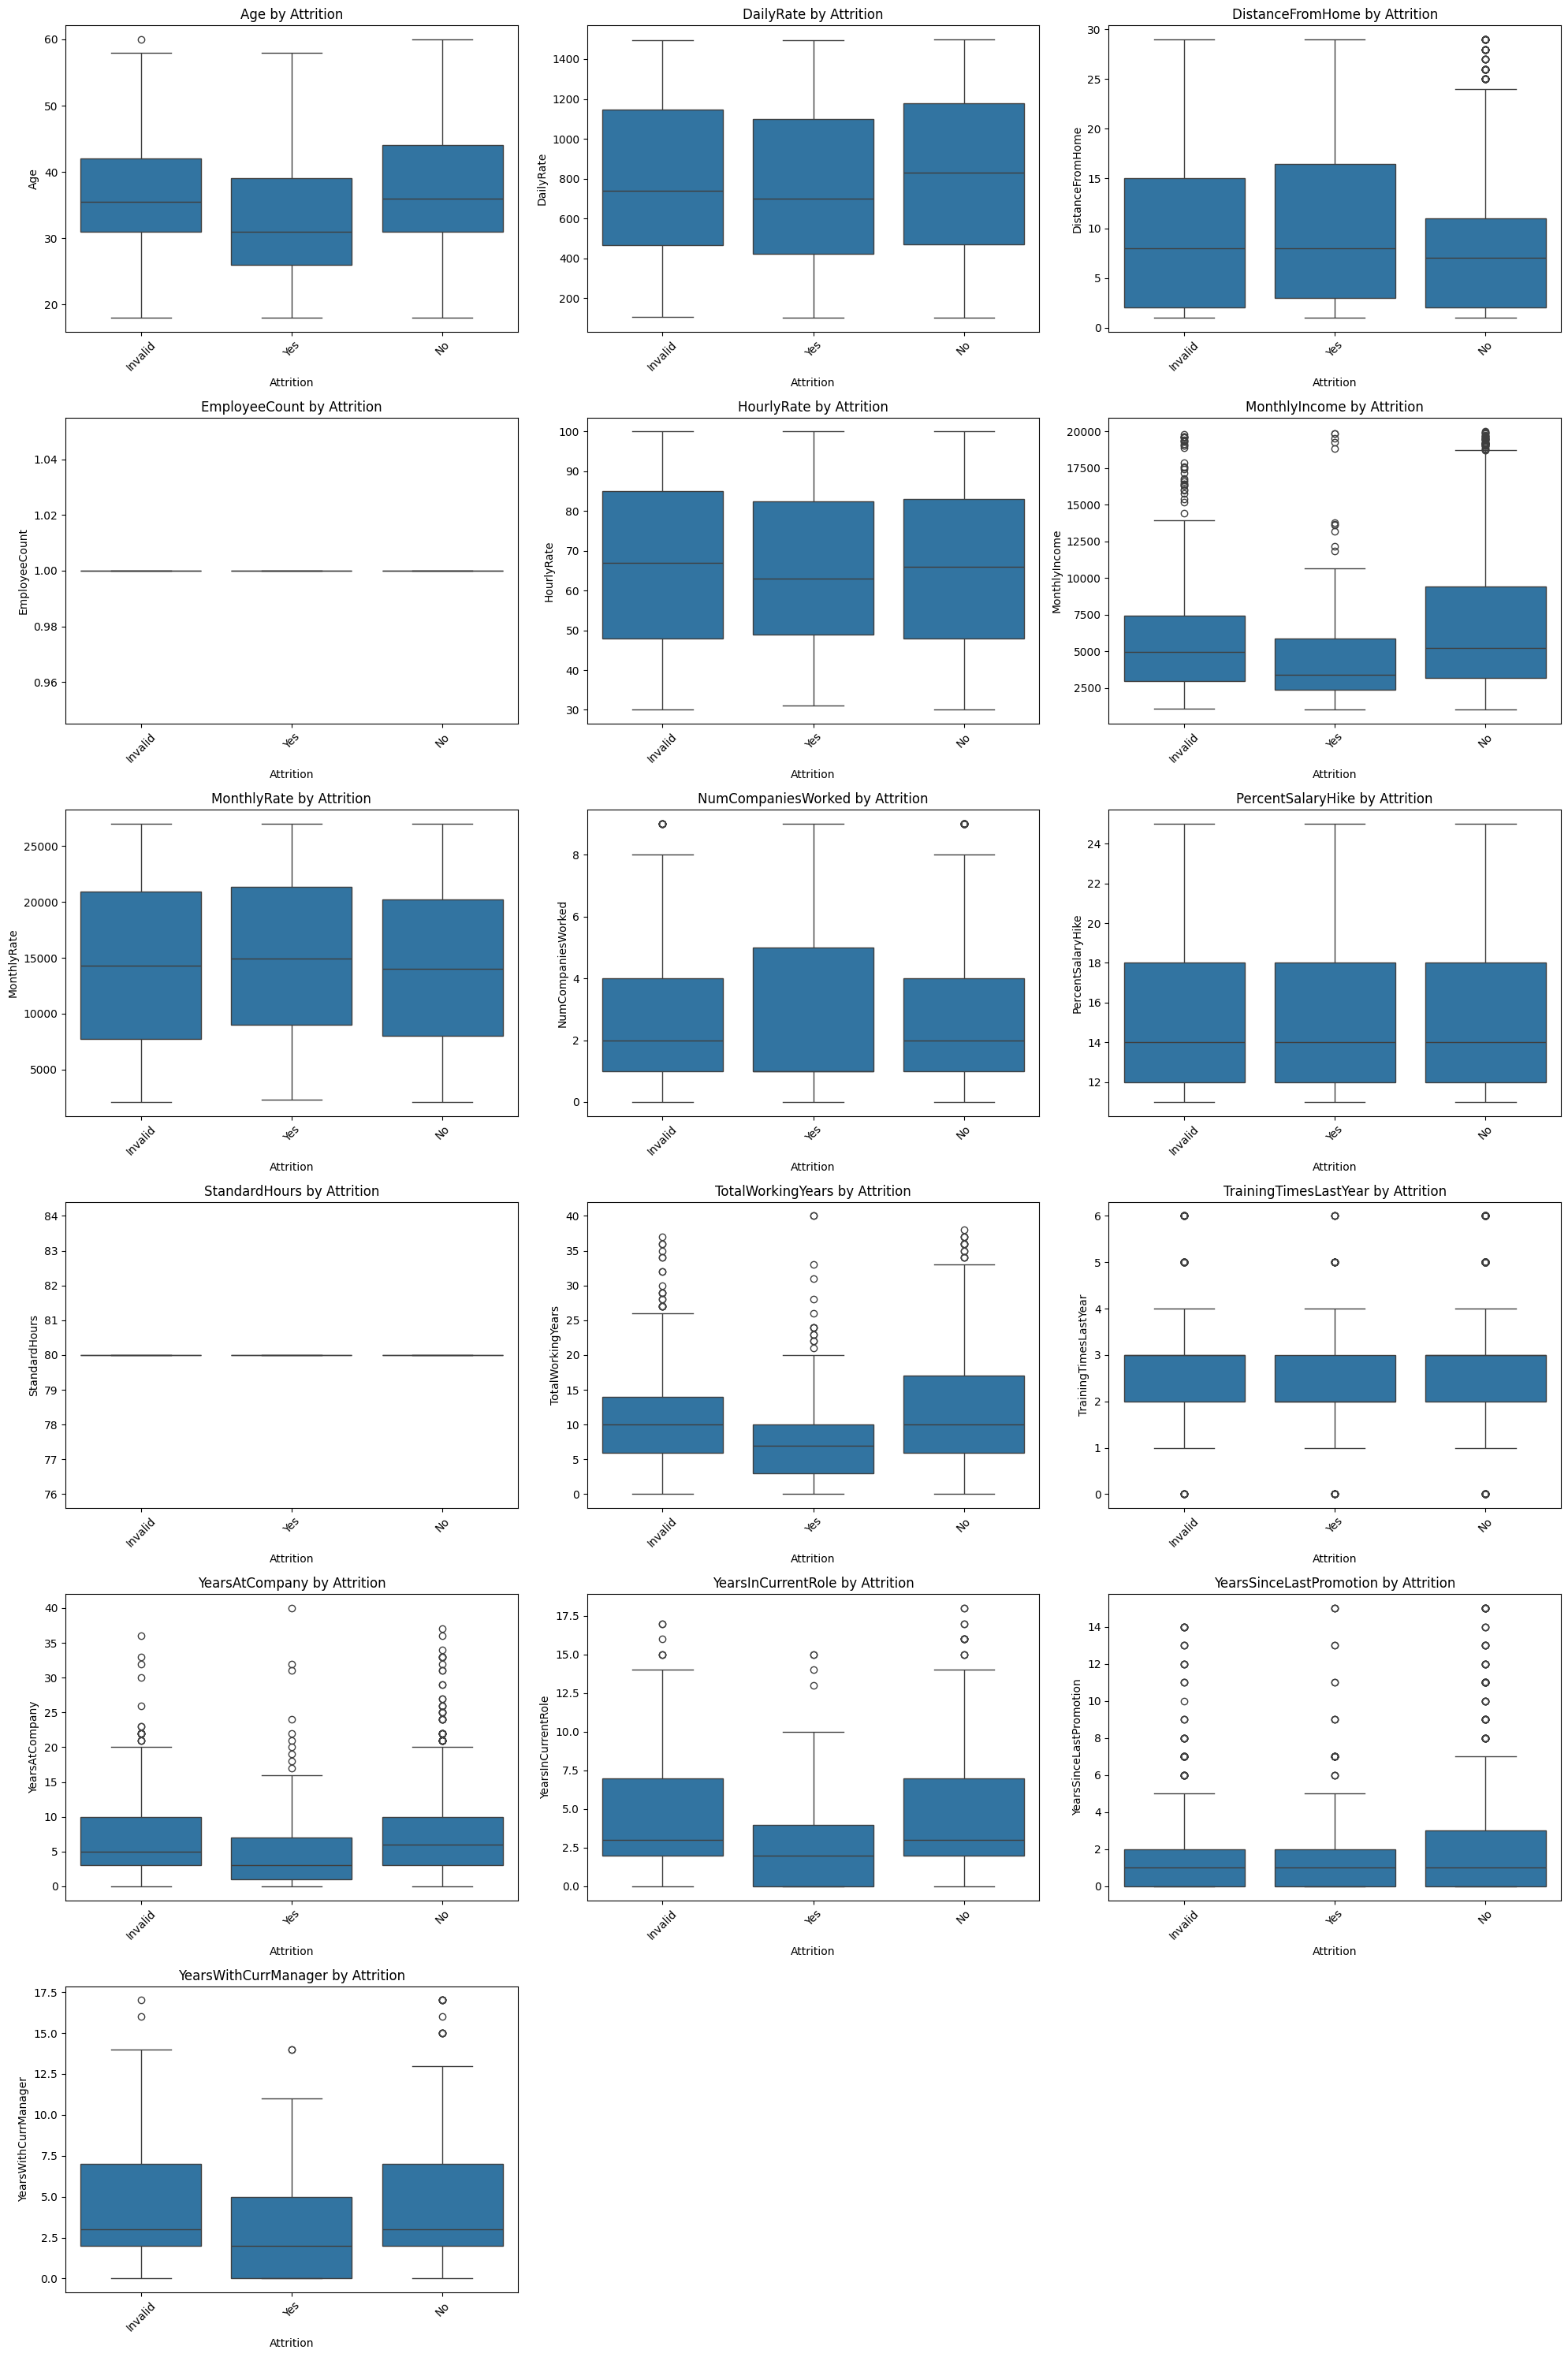

In [ ]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(df_num.columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x='Attrition', y=col, data=df_viz)
    plt.title(f'{col} by Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Berdasarkan hasil analisis diatas terdapat beberapa insight sebagai berikut:

* Karyawan yang meninggalkan perusahaan (Yes) cenderung lebih muda dibandingkan yang bertahan (No).
Median usia untuk attrition 'Yes' lebih rendah dibandingkan 'No'.
* Tidak terlihat perbedaan yang signifikan dalam daily rate antara kelompok attrition.
* Karyawan dengan attrition 'Yes' cenderung memiliki jarak dari rumah yang sedikit lebih jauh.
Terdapat beberapa outlier dengan jarak yang sangat jauh, terutama pada kelompok 'No'.
* EmployeeCount by Attrition: Tidak ada variasi yang terlihat, semua nilai sama.
* HourlyRate by Attrition: Tidak terlihat perbedaan yang signifikan dalam hourly rate antara kelompok attrition.
* Karyawan yang bertahan (No) cenderung memiliki pendapatan bulanan yang lebih tinggi. Terdapat banyak outlier dengan pendapatan tinggi, terutama pada kelompok 'No'.
* MonthlyRate by Attrition: Tidak terlihat perbedaan yang signifikan dalam monthly rate antara kelompok attrition.
* Karyawan dengan attrition 'Yes' cenderung telah bekerja di lebih banyak perusahaan sebelumnya.
* PercentSalaryHike by Attrition: Tidak terlihat perbedaan yang signifikan dalam persentase kenaikan gaji antara kelompok attrition.
* StandardHours by Attrition: Tidak ada variasi yang terlihat, semua nilai sama.
* Karyawan yang bertahan (No) cenderung memiliki total tahun kerja yang lebih lama.
Terdapat beberapa outlier dengan masa kerja yang sangat lama.
* Karyawan yang bertahan (No) cenderung memiliki sedikit lebih banyak waktu pelatihan.
* Karyawan yang bertahan (No) cenderung memiliki masa kerja yang lebih lama di perusahaan. Terdapat beberapa outlier dengan masa kerja yang sangat lama.
* Karyawan yang bertahan (No) cenderung memiliki masa kerja yang lebih lama dalam peran saat ini.
* YearsSinceLastPromotion by Attrition: Tidak terlihat perbedaan yang signifikan dalam waktu sejak promosi terakhir antara kelompok attrition. Terdapat beberapa outlier dengan waktu yang sangat lama sejak promosi terakhir.
* Karyawan yang bertahan (No) cenderung memiliki masa kerja yang sedikit lebih lama dengan manajer saat ini.

#### Heatmap

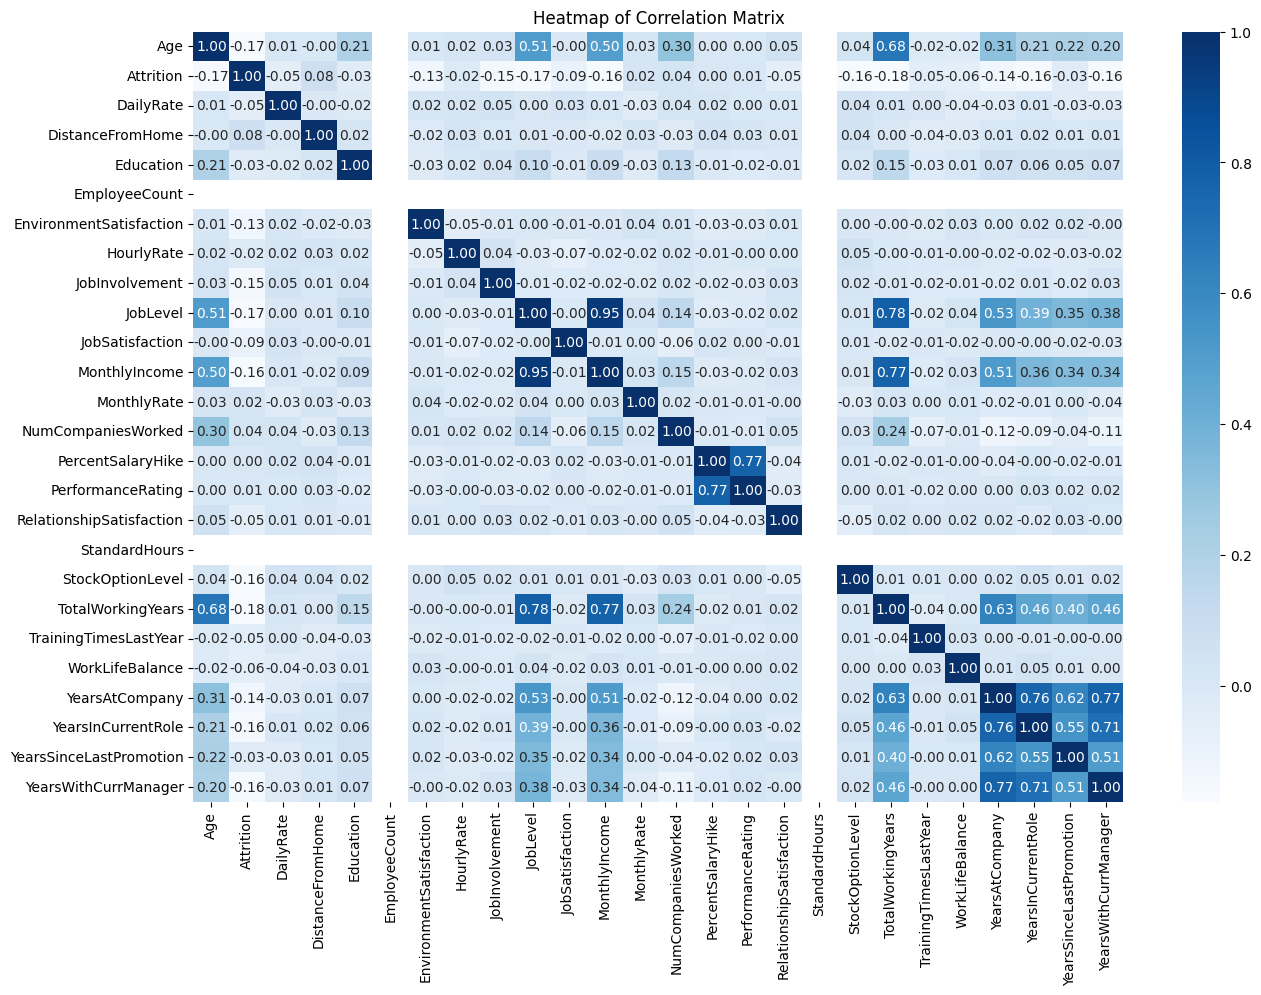

In [ ]:
# Encode 'Attrition' column to integers
df_corr = df_viz.copy()
df_corr['Attrition'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate the correlation matrix
corr = df_corr.select_dtypes(include=[int, float]).corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f") # Use Blues colormap
plt.title('Heatmap of Correlation Matrix')
plt.show()

Korelasi Kuat Positif (>0.7):

* JobLevel dengan MonthlyIncome (0.95)
* TotalWorkingYears dengan JobLevel (0.78) dan MonthlyIncome (0.77)
* YearsAtCompany dengan YearsInCurrentRole (0.76), YearsSinceLastPromotion (0.62), dan YearsWithCurrManager (0.77)
* PercentSalaryHike dengan PerformanceRating (0.77)


Korelasi Moderat Positif (0.5-0.7):

* Age dengan TotalWorkingYears (0.68)
* JobLevel dengan StockOptionLevel (0.78)
* YearsInCurrentRole dengan YearsSinceLastPromotion (0.55) dan YearsWithCurrManager (0.71)

Korelasi dengan Attrition (negatif):

* Age (-0.17)
* JobLevel (-0.17)
* MonthlyIncome (-0.16)
* TotalWorkingYears (-0.18)
* YearsAtCompany (-0.14)
* YearsInCurrentRole (-0.16)
* YearsWithCurrManager (-0.16)

Variabel yang tidak berkorelasi kuat dengan yang lain:

* DailyRate
* DistanceFromHome
* EnvironmentSatisfaction
* HourlyRate
* JobSatisfaction
* MonthlyRate
* WorkLifeBalance

Multikolinearitas potensial:

* Antara JobLevel, MonthlyIncome, dan TotalWorkingYears
* Antara variabel-variabel terkait masa kerja (YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager)

### Multivariate Kategorikal w/ Atrition

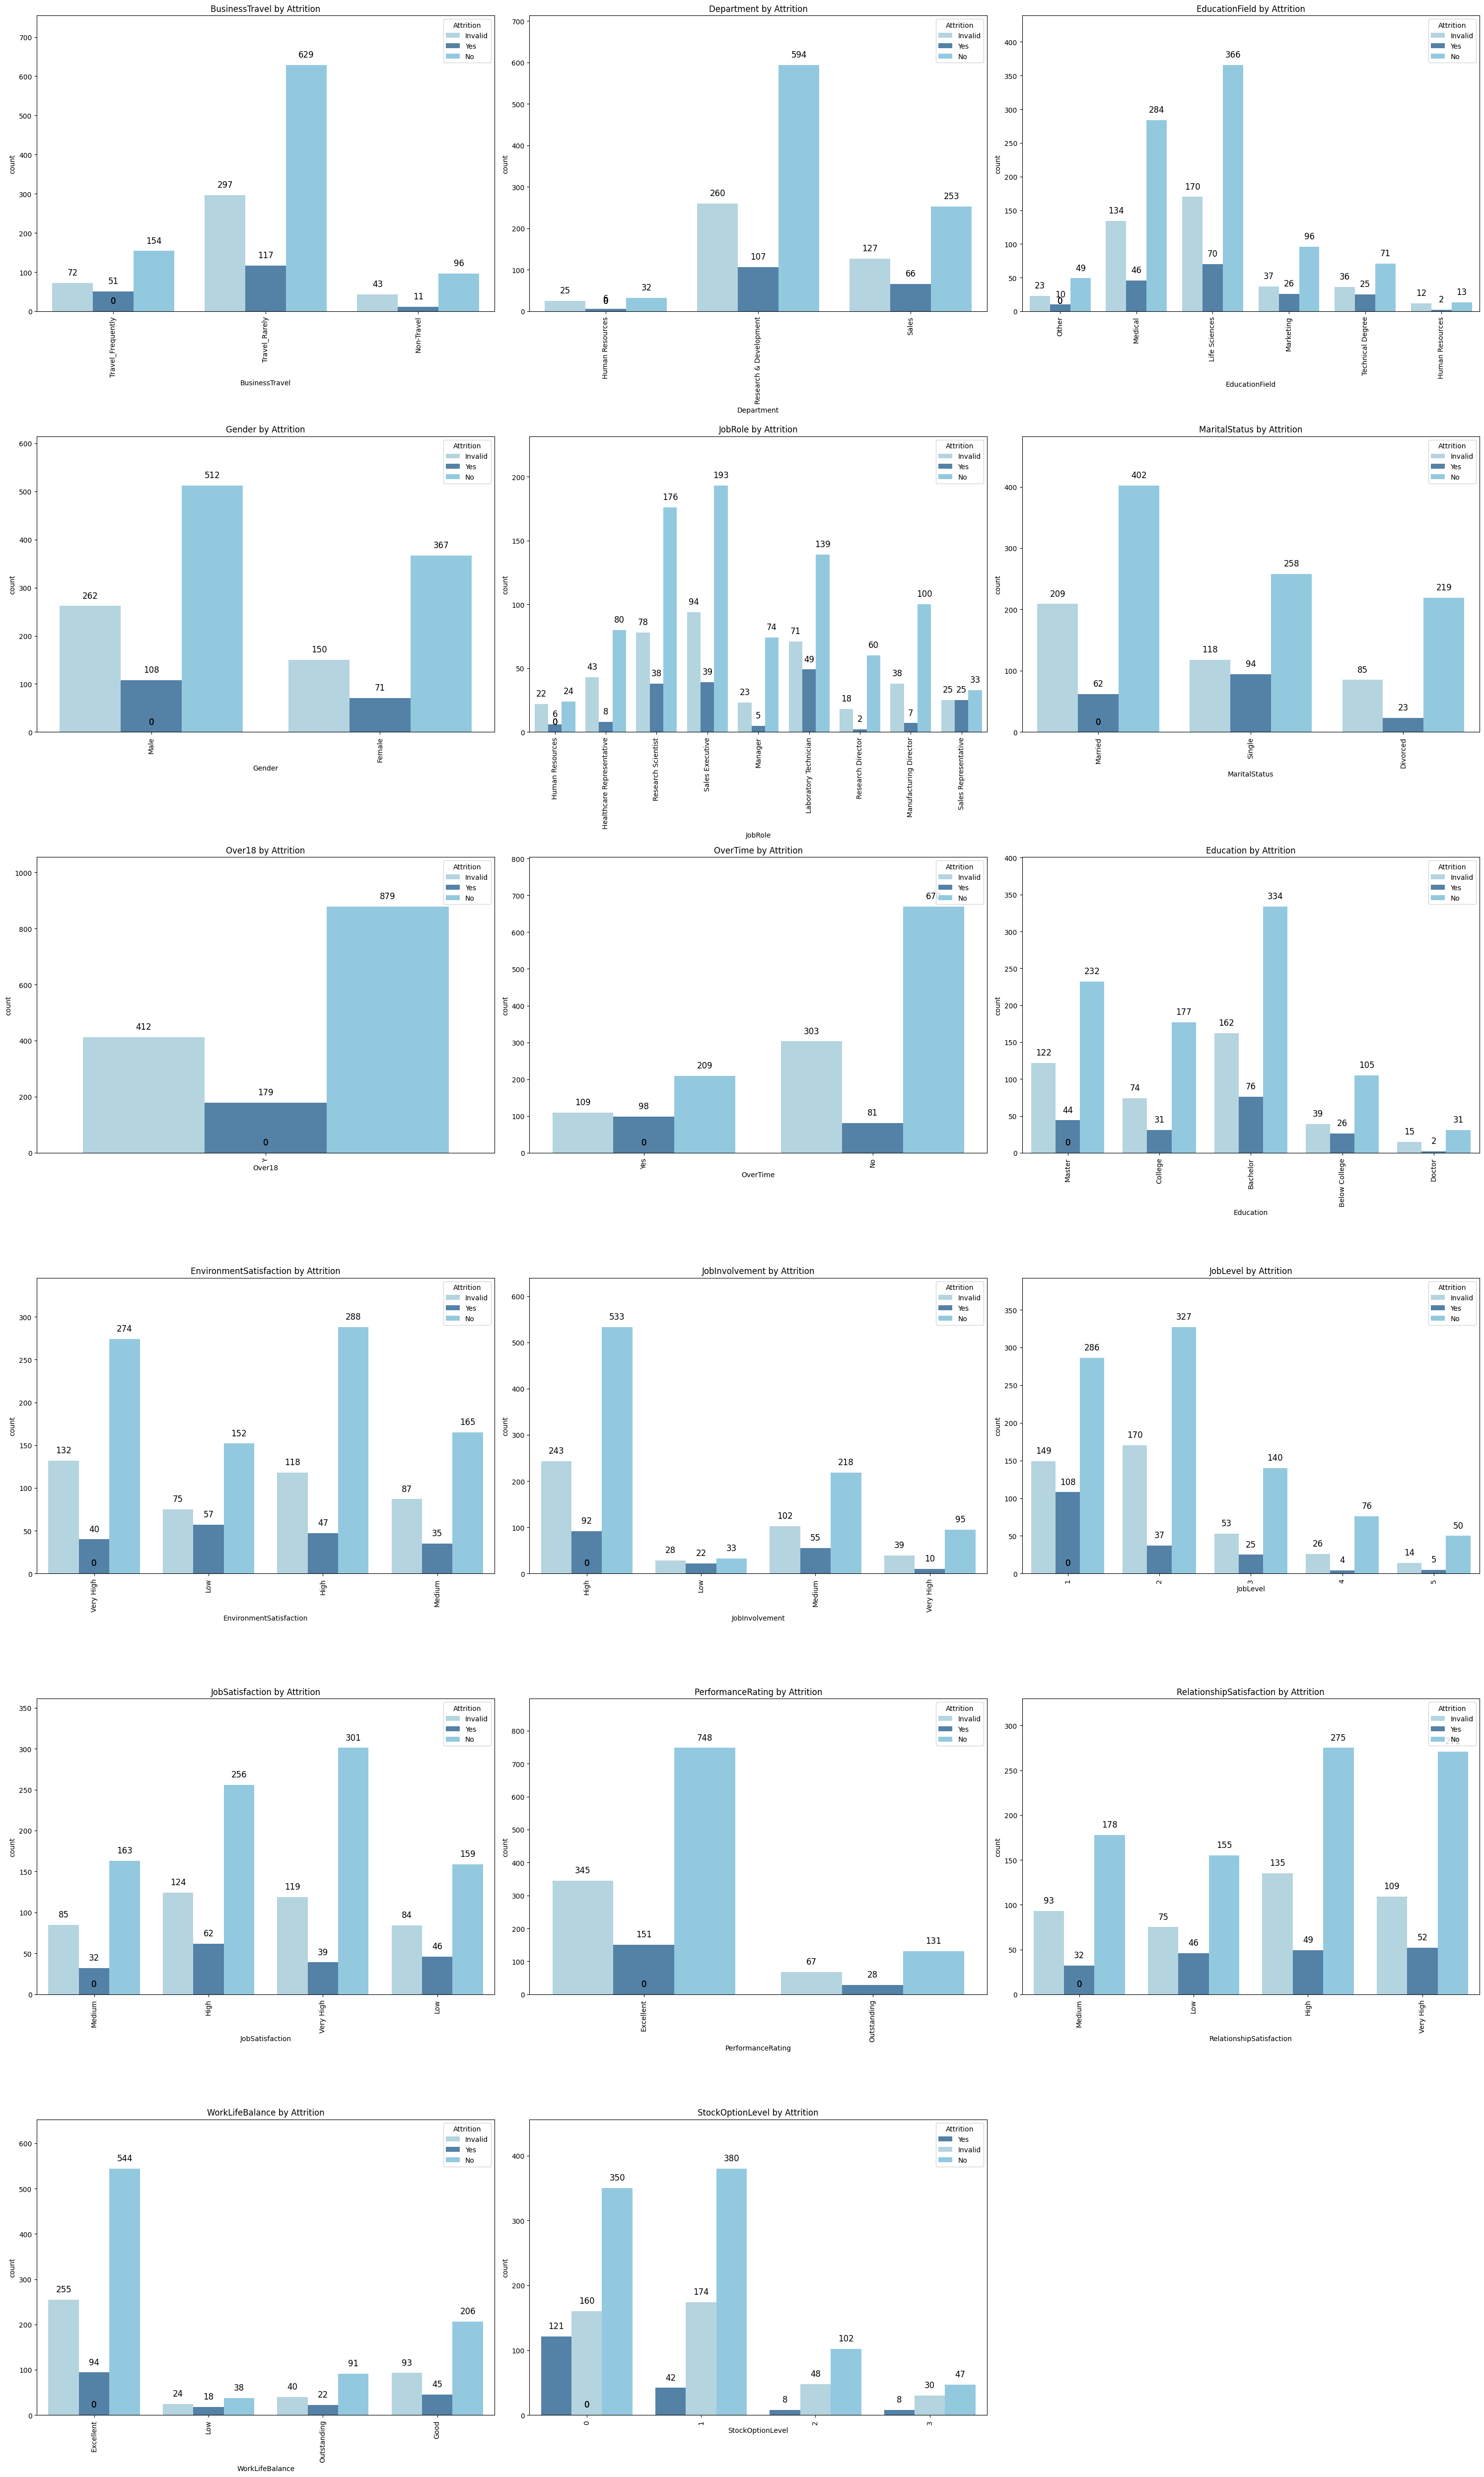

In [ ]:
# countplot untuk tiap kolom kategorikal dengan kolom 'Attrition' sebagai hue
plt.figure(figsize=(30, 50))
j=1
for i, col in enumerate(df_cat.columns, 1):
  if col != 'Attrition':
    plt.subplot(6, 3, j)
    ax = sns.countplot(data=df_cat, x=col, hue='Attrition', palette={'Yes': 'steelblue', 'No': 'skyblue', 'Invalid': 'lightblue'}) # Changed df_cat to df_viz
    plt.title(f'{col} by Attrition')
    plt.xticks(rotation=90)
    j+=1

    # Menambahkan nilai di atas setiap bar dengan padding lebih besar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 15),
                    textcoords='offset points')

    # Mengatur batas sumbu y agar lebih tinggi
    max_height = max([p.get_height() for p in ax.patches])
    ax.set_ylim(0, max_height * 1.2)  # 20% padding atas

plt.tight_layout()
plt.show()

Berdasarkan hasil analisis diatas terdapat beberapa insight sebagai berikut:

* Business Travel: Karyawan yang sering melakukan perjalanan bisnis (Travel_Frequently) memiliki tingkat attrition yang lebih tinggi dibandingkan yang jarang bepergian.
* Department: Department Sales memiliki tingkat attrition tertinggi, diikuti oleh Human Resources.
* Education Field: Life Sciences dan Medical memiliki tingkat attrition tertinggi.
* Gender: Proporsi attrition pada laki-laki sedikit lebih tinggi dibandingkan perempuan.
* Job Role: Sales Representatives memiliki tingkat attrition tertinggi, diikuti oleh Human Resources dan Laboratory Technicians.
* Marital Status: Karyawan yang single memiliki tingkat attrition lebih tinggi dibandingkan yang menikah atau bercerai.
* Over Time: Karyawan yang bekerja lembur memiliki tingkat attrition yang jauh lebih tinggi.
* Education: Tidak terlihat perbedaan yang signifikan dalam tingkat attrition berdasarkan tingkat pendidikan.
* Environment Satisfaction: Karyawan dengan tingkat kepuasan lingkungan kerja yang rendah memiliki tingkat attrition yang lebih tinggi.
* Job Involvement: Karyawan dengan tingkat keterlibatan kerja yang rendah memiliki tingkat attrition yang lebih tinggi.
* Job Satisfaction: Karyawan dengan tingkat kepuasan kerja yang rendah memiliki tingkat attrition yang lebih tinggi.

# Data Preparation / Preprocessing

## Split Data

Dataset akan dibagi 3, data train, test dan val. Dataset val akan digunakan untuk memprediksi attrition dengan nilai null.

#### Split Data Attrition == Null

In [ ]:
new_df = df.copy()

# drop data EmployeeId EmployeCount StandardHours Over18
new_df = new_df.drop(columns=['EmployeeId', 'EmployeeCount', 'StandardHours', 'Over18'])

In [ ]:
df_val = new_df[new_df['Attrition'].isna()]
df_val

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,Male,...,3,2,1,7,2,3,6,2,1,2
4,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,Female,...,3,2,3,20,2,3,5,3,0,2
5,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,4,Male,...,3,4,0,1,3,3,1,0,0,0
12,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,3,Female,...,3,3,1,11,4,2,5,4,1,2
18,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,4,Male,...,3,3,2,7,6,3,7,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,24,NaN,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,Female,...,3,3,0,6,2,3,6,3,1,3
1447,42,NaN,Travel_Frequently,288,Research & Development,2,3,Life Sciences,4,Male,...,3,3,1,24,3,1,20,8,13,9
1448,38,NaN,Travel_Rarely,437,Sales,16,3,Life Sciences,2,Female,...,3,2,0,8,5,4,3,2,1,2
1462,41,NaN,Travel_Rarely,1206,Sales,23,2,Life Sciences,4,Male,...,3,4,0,21,2,3,2,0,0,2


#### Split Data Train Test

In [ ]:
df_train_test = new_df[~new_df['Attrition'].isna()]
df_train_test

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Female,...,3,1,0,15,2,1,1,0,0,0
2,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,Male,...,3,3,3,18,2,4,10,0,2,7
3,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,Female,...,3,4,1,23,2,4,20,4,4,8
6,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,2,Male,...,4,3,3,6,2,2,4,3,0,2
7,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,4,Male,...,3,4,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,2,Male,...,3,1,0,10,2,2,10,7,1,9
1465,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,3,Female,...,3,4,0,10,4,4,1,0,0,0
1467,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,3,Female,...,3,4,0,1,4,2,1,1,0,0
1468,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,3,Male,...,3,2,1,6,0,3,4,2,0,0


In [ ]:
# Misalnya kolom Attrition Anda adalah 'Attrition'
X = df_train_test.drop('Attrition', axis=1)
y = df_train_test['Attrition']

# Membagi data dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menggabungkan kembali fitur dan Attrition jika diperlukan
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
# mendapatkan shape df_train dan df_test
print('df_train shape:', df_train.shape)
print('df_test shape:', df_test.shape)

df_train shape: (846, 31)
df_test shape: (212, 31)


## Label Encoder

In [ ]:
le = LabelEncoder()

# Simpan encoder untuk setiap kolom kategori
encoders = {}

col_cat = df_train.select_dtypes(include=['object']).columns

# Encode kolom kategori di df_train
for col in col_cat:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    encoders[col] = le

# Transform kolom kategori di df_test dan df_val menggunakan encoder yang sudah dilatih
for col in col_cat:
    df_test[col] = encoders[col].transform(df_test[col])
    df_val[col] = encoders[col].transform(df_val[col])


<ipython-input-163-fbb4c1eb8ab3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[col] = encoders[col].transform(df_val[col])
<ipython-input-163-fbb4c1eb8ab3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[col] = encoders[col].transform(df_val[col])
<ipython-input-163-fbb4c1eb8ab3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

## Feature Selection

In [ ]:
X_train = df_train.drop(columns=['Attrition'])
y_train = df_train['Attrition']

X_test = df_test.drop(columns=['Attrition'])
y_test = df_test['Attrition']

X_val = df_val.drop(columns=['Attrition'])

In [ ]:
# Membuat model Random Forest dengan class_weight 'balanced'
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Melatih model
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# fungsi menampilkan fitur importance
def show_fitur(model, X_train):
  feature_names = X_train.columns
  feature_importances = model.feature_importances_

  df_feature_importances = pd.DataFrame({'feature': feature_names,
                                         'importance': feature_importances}).sort_values(by='importance', ascending=True)

  colors = ['steelblue' if imp >= 0.03 else 'lightblue' for imp in df_feature_importances['importance']]
  plt.figure(figsize=(10, 8))
  plt.barh(df_feature_importances['feature'], df_feature_importances['importance'], color=colors)
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.title(f'Feature Importance')
  plt.show()

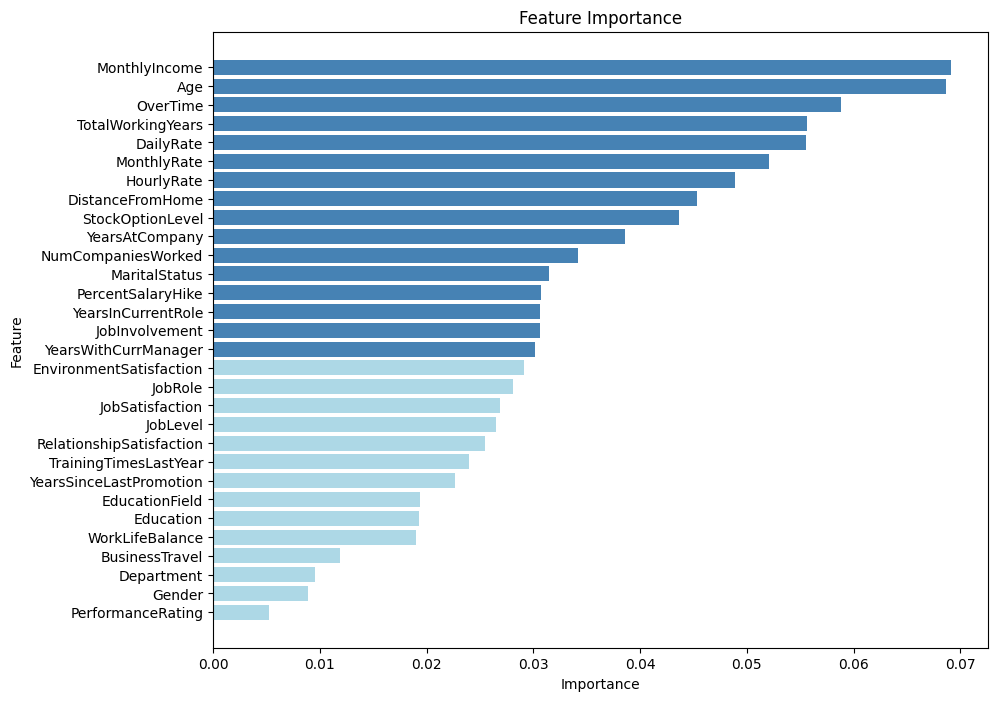

In [ ]:
show_fitur(rf, X_train)

In [ ]:
# fungsi seleksi fitur dengan importance >=0.03
def selected_feature(x_train, x_test, x_val, model):
  feature_names = x_train.columns
  feature_importances = model.feature_importances_

  df_feature_importances = pd.DataFrame({'feature': feature_names,
                                         'importance': feature_importances}).sort_values(by='importance', ascending=True)

  selected_features = df_feature_importances[df_feature_importances['importance'] >= 0.03]['feature'].tolist()

  x_train_selected = x_train[selected_features]
  x_test_selected = x_test[selected_features]
  x_val_selected = x_val[selected_features]

  print(f'Banyak Fitur: {len(x_train_selected.columns)}')

  return x_train_selected, x_test_selected, x_val_selected

In [ ]:
X_train_selected, X_test_selected, X_val_selected = selected_feature(X_train, X_test, x_val, rf)

Banyak Fitur: 16


# Modeling

## Decision tree

In [ ]:
def cv_decision_tree(X_data, y_data, data_name):
    dtc = DecisionTreeClassifier(random_state=42, class_weight="balanced")

    param_grid = {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(dtc, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_data, y_data)

    print(f'Data {data_name}')
    print("Best Parameters: ", grid_search.best_params_)
    print()

    best_dtc_model = grid_search.best_estimator_
    return best_dtc_model


In [ ]:
dtc_ori = cv_decision_tree(X_train, y_train, 'Ori')
dtc_selected = cv_decision_tree(X_train_selected, y_train, 'Selected')

Data Ori
Best Parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}

Data Selected
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}



## Random Forest

In [ ]:

def cv_random_forest(X_data, y_data, data_name):
    rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }

    grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_data, y_data)

    print(f'Data {data_name}')
    print("Best Parameters: ", grid_search.best_params_)
    print()

    best_rfc_model = grid_search.best_estimator_
    return best_rfc_model

In [ ]:
rf_ori = cv_random_forest(X_train, y_train, 'Ori')
rf_selected = cv_random_forest(X_train_selected, y_train, 'Selected')

Data Ori
Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Data Selected
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}



## XGBoost:

In [ ]:
def cv_xgboost(X_data, y_data, data_name):
    # Menghitung scale_pos_weight
    neg = sum(y_data == 0)
    pos = sum(y_data == 1)
    scale_pos_weight = neg / pos

    # Inisialisasi model XGBClassifier
    xgb = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

    # Definisikan grid parameter yang akan diuji
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
    }

    # Inisialisasi GridSearchCV
    grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

    # Lakukan pencarian grid pada data pelatihan
    grid_search.fit(X_data, y_data)

    print(f'Data {data_name}')
    print("Best Parameters: ", grid_search.best_params_)
    print()

    best_xgb_model = grid_search.best_estimator_

    return best_xgb_model

In [ ]:
xgb_ori = cv_xgboost(X_train, y_train, 'Ori')
xgb_selected = cv_xgboost(X_train_selected, y_train, 'Selected')

Data Ori
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}

Data Selected
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.5, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}



# Evaluation

In [ ]:
def evaluasi_model(X_test, y_test, model, data_name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'{data_name}:')
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

    print()

    return acc, precision, recall, f1

## Decision Tree

In [ ]:
acc_dtc_ori, precision_dtc_ori, recall_dtc_ori, f1_dtc_ori = evaluasi_model(X_test, y_test, dtc_ori, 'Decision Tree Ori')
acc_dtc_selected, precision_dtc_selected, recall_dtc_selected, f1_dtc_selected = evaluasi_model(X_test_selected, y_test, dtc_selected, 'Decision Tree Selected')

Decision Tree Ori:
Accuracy: 0.6886792452830188
Precision: 0.5492610837438423
Recall: 0.5694444444444444
F1-score: 0.548936170212766
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80       176
         1.0       0.24      0.39      0.30        36

    accuracy                           0.69       212
   macro avg       0.55      0.57      0.55       212
weighted avg       0.75      0.69      0.71       212


Decision Tree Selected:
Accuracy: 0.6933962264150944
Precision: 0.5050565535595476
Recall: 0.5059974747474747
F1-score: 0.504013245509844
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       176
         1.0       0.18      0.22      0.20        36

    accuracy                           0.69       212
   macro avg       0.51      0.51      0.50       212
weighted avg       0.72      0.69      0.71       212




## Random Forest

In [ ]:
acc_rf_ori, precision_rf_ori, recall_rf_ori, f1_rf_ori = evaluasi_model(X_test, y_test, rf_ori, 'Random Forest Ori')
acc_rf_selected, precision_rf_selected, recall_rf_selected, f1_rf_selected = evaluasi_model(X_test_selected, y_test, rf_selected, 'Random Forest Selected')

Random Forest Ori:
Accuracy: 0.8537735849056604
Precision: 0.7783146501739466
Recall: 0.6136363636363636
F1-score: 0.6423401360544218
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       176
         1.0       0.69      0.25      0.37        36

    accuracy                           0.85       212
   macro avg       0.78      0.61      0.64       212
weighted avg       0.84      0.85      0.82       212


Random Forest Selected:
Accuracy: 0.8490566037735849
Precision: 0.7633333333333333
Recall: 0.5997474747474747
F1-score: 0.624113475177305
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       176
         1.0       0.67      0.22      0.33        36

    accuracy                           0.85       212
   macro avg       0.76      0.60      0.62       212
weighted avg       0.83      0.85      0.82       212




## XGBoost

In [ ]:
acc_xgb_ori, precision_xgb_ori, recall_xgb_ori, f1_xgb_ori = evaluasi_model(X_test, y_test, xgb_ori, 'XGBoost Ori')
acc_xgb_selected, precision_xgb_selected, recall_xgb_selected, f1_xgb_selected = evaluasi_model(X_test_selected, y_test, xgb_selected, 'Random Forest Selected')

XGBoost Ori:
Accuracy: 0.8301886792452831
Precision: 0.6881720430107527
Recall: 0.6436237373737373
F1-score: 0.6599536624487614
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       176
         1.0       0.50      0.36      0.42        36

    accuracy                           0.83       212
   macro avg       0.69      0.64      0.66       212
weighted avg       0.81      0.83      0.82       212


Random Forest Selected:
Accuracy: 0.8113207547169812
Precision: 0.6334928229665072
Recall: 0.5880681818181819
F1-score: 0.600527605049934
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       176
         1.0       0.41      0.25      0.31        36

    accuracy                           0.81       212
   macro avg       0.63      0.59      0.60       212
weighted avg       0.78      0.81      0.79       212




## Best Model

In [ ]:
def plot_evaluasi(dataframe):
  df_ori = dataframe

  # Warna yang berbeda tapi tetap satu tone dan lembut
  colors = ['grey', 'lightblue', 'skyblue', 'steelblue']
  alpha_values = [0.2, 1]

  # Batas atas sumbu y
  y_upper_limit = 1.1

  # Bar chart
  barWidth = 0.15
  space = 0.02  # Jarak antara grup bar

  r1 = np.arange(len(df_ori['dataset']))
  r2 = [x + barWidth + space for x in r1]
  r3 = [x + barWidth + space for x in r2]
  r4 = [x + barWidth + space for x in r3]

  plt.bar(r1, df_ori['accuracy'], color=colors[0], alpha=alpha_values[0], width=barWidth, edgecolor='none', linewidth=0, label='Accuracy')
  plt.bar(r2, df_ori['precision'], color=colors[1], alpha=alpha_values[1], width=barWidth, edgecolor='none', linewidth=0, label='Precision')
  plt.bar(r3, df_ori['recall'], color=colors[2], alpha=alpha_values[1], width=barWidth, edgecolor='none', linewidth=0, label='Recall')
  plt.bar(r4, df_ori['f1 score'], color=colors[3], alpha=alpha_values[1], width=barWidth, edgecolor='none', linewidth=0, label='F1-Score')

  # Menambahkan nilai di atas setiap bar dengan rotasi 90 derajat ke kiri
  for i, val in enumerate(df_ori['accuracy']):
      plt.text(r1[i], min(val + 0.01, y_upper_limit), round(val, 3), rotation=90, ha='center', va='bottom')

  for i, val in enumerate(df_ori['precision']):
      plt.text(r2[i], min(val + 0.01, y_upper_limit), round(val, 3), rotation=90, ha='center', va='bottom')

  for i, val in enumerate(df_ori['recall']):
      plt.text(r3[i], min(val + 0.01, y_upper_limit), round(val, 3), rotation=90, ha='center', va='bottom')

  for i, val in enumerate(df_ori['f1 score']):
      plt.text(r4[i], min(val + 0.01, y_upper_limit), round(val, 3), rotation=90, ha='center', va='bottom')


  # Label dan legend horizontal di atas bar
  plt.xlabel('')
  plt.xticks([r + (barWidth*4/2) - space for r in range(len(df_ori['dataset']))], df_ori['dataset'], rotation=45)
  plt.yticks([])  # Sembunyikan ticks pada sumbu y
  plt.ylim(0, y_upper_limit)  # Set batas atas sumbu y
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=4)  # Atur legenda di atas bar
  plt.title(f'Evaluasi Model')

  # Tampilkan plot
  plt.tight_layout()
  plt.show()


In [ ]:
# Nama dataset dan jenis fitur
datasets = ['DTC Ori', 'DTC Selected', 'RF Ori', 'RF Selected', 'XGB Ori', 'XGB Selected']

# Nilai metrik evaluasi untuk setiap model
accuracy = [acc_dtc_ori, acc_dtc_selected, acc_rf_ori, acc_rf_selected, acc_xgb_ori, acc_xgb_selected]
precision = [precision_dtc_ori, precision_dtc_selected, precision_rf_ori, precision_rf_selected, precision_xgb_ori, precision_xgb_selected]
recall = [recall_dtc_ori, recall_dtc_selected, recall_rf_ori, recall_rf_selected, recall_xgb_ori, recall_xgb_selected]
f1_score = [f1_dtc_ori, f1_dtc_selected, f1_rf_ori, f1_rf_selected, f1_xgb_ori, f1_xgb_selected]

In [ ]:
result = {'dataset': datasets,
          'accuracy': accuracy,
          'precision': precision,
          'recall': recall,
          'f1 score': f1_score}

df_result = pd.DataFrame(result)
df_result

,dataset,accuracy,precision,recall,f1 score
0,DTC Ori,0.688679,0.549261,0.569444,0.548936
1,DTC Selected,0.693396,0.505057,0.505997,0.504013
2,RF Ori,0.853774,0.778315,0.613636,0.642340
3,RF Selected,0.849057,0.763333,0.599747,0.624113
4,XGB Ori,0.830189,0.688172,0.643624,0.659954
5,XGB Selected,0.811321,0.633493,0.588068,0.600528


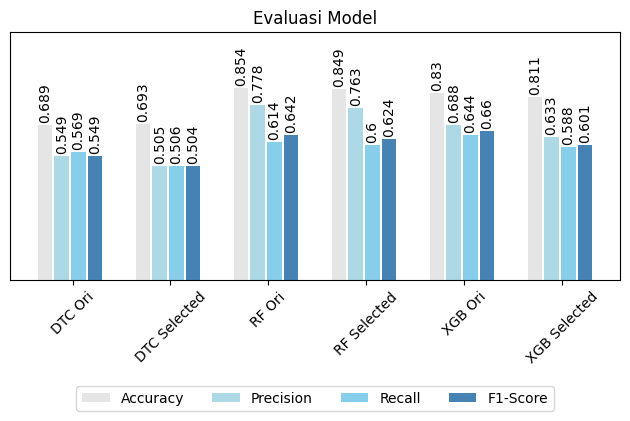

In [ ]:
plot_evaluasi(df_result)

Karena data imbalance, penilaian model terbaik dilihat berdasarkan f1 score tertingg. Model yang mendapatkan f1 score tertinggi adalah XGB dengan dataset original.

In [ ]:
best_model = xgb_ori
# menyimpan base model ke dir
import pickle
pickle.dump(best_model, open('best_model.pkl', 'wb'))


# Prediksi Data Val

In [ ]:
# predict X_val dengan load model .pkl
loaded_model = pickle.load(open('best_model.pkl', 'rb'))
y_pred = loaded_model.predict(X_val)

y_pred = y_pred.tolist()

In [ ]:
col_cat

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

Kolom attrition merupakan hasil prediksi dari model yang dibuat

In [ ]:
# Masukkan prediksi ke df_val
df_val['Attrition'] = y_pred

# Inverse transform kolom kategori di df_val menggunakan encoder yang sudah dilatih
for col in col_cat:
    df_val[col] = encoders[col].inverse_transform(df_val[col])

df_val

<ipython-input-164-147d99a874b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['Attrition'] = y_pred
<ipython-input-164-147d99a874b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[col] = encoders[col].inverse_transform(df_val[col])
<ipython-input-164-147d99a874b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,0,Travel_Frequently,1444,Human Resources,1,4,Other,4,Male,...,3,2,1,7,2,3,6,2,1,2
4,40,0,Travel_Rarely,1194,Research & Development,2,4,Medical,3,Female,...,3,2,3,20,2,3,5,3,0,2
5,29,1,Travel_Rarely,352,Human Resources,6,1,Medical,4,Male,...,3,4,0,1,3,3,1,0,0,0
12,47,0,Travel_Rarely,571,Sales,14,3,Medical,3,Female,...,3,3,1,11,4,2,5,4,1,2
18,25,0,Travel_Frequently,772,Research & Development,2,1,Life Sciences,4,Male,...,3,3,2,7,6,3,7,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,24,0,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,Female,...,3,3,0,6,2,3,6,3,1,3
1447,42,0,Travel_Frequently,288,Research & Development,2,3,Life Sciences,4,Male,...,3,3,1,24,3,1,20,8,13,9
1448,38,0,Travel_Rarely,437,Sales,16,3,Life Sciences,2,Female,...,3,2,0,8,5,4,3,2,1,2
1462,41,0,Travel_Rarely,1206,Sales,23,2,Life Sciences,4,Male,...,3,4,0,21,2,3,2,0,0,2


In [ ]:
# kolom ordinal
ordinal_col = ['Education',
'EnvironmentSatisfaction',
'JobInvolvement',
'JobLevel',
'JobSatisfaction',
'PerformanceRating',
'RelationshipSatisfaction',
'WorkLifeBalance',
'StockOptionLevel']

In [ ]:
# maping data berdasarkan deskripsi atribut
education_mapping = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
satisfaction_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_mapping = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}

In [ ]:
# replace data sesuai mapping
for col in ordinal_col:
  if col == 'Education':
    df_val[col] = df_val[col].replace(education_mapping)
  elif col in ['PerformanceRating', 'WorkLifeBalance']:
    df_val[col] = df_val[col].replace(performance_mapping)
  elif col in ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction']:
    df_val[col] = df_val[col].replace(satisfaction_mapping)

# Simpan Data

Menggabungkan kembali df_val dan df_train_test untuk digunakan dalam pembuatan dashboard.

In [ ]:
df = pd.concat([df_train_test, df_val])
df['Attrition'] = np.where(df['Attrition'] == 1, 'Yes', 'No')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Female,...,3,1,0,15,2,1,1,0,0,0
2,51,Yes,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,Male,...,3,3,3,18,2,4,10,0,2,7
3,42,No,Travel_Frequently,555,Sales,26,3,Marketing,3,Female,...,3,4,1,23,2,4,20,4,4,8
6,40,No,Travel_Rarely,1124,Sales,1,2,Medical,2,Male,...,4,3,3,6,2,2,4,3,0,2
7,55,Yes,Travel_Rarely,725,Research & Development,2,3,Medical,4,Male,...,3,4,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,24,No,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,Female,...,3,3,0,6,2,3,6,3,1,3
1447,42,No,Travel_Frequently,288,Research & Development,2,3,Life Sciences,4,Male,...,3,3,1,24,3,1,20,8,13,9
1448,38,No,Travel_Rarely,437,Sales,16,3,Life Sciences,2,Female,...,3,2,0,8,5,4,3,2,1,2
1462,41,No,Travel_Rarely,1206,Sales,23,2,Life Sciences,4,Male,...,3,4,0,21,2,3,2,0,0,2


In [ ]:
# simpan df menjadi csv
df.to_csv('employee_attrition.csv', index=False)